In [105]:
import os
import sys
import glob
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
os.chdir('/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('max_colwidth', 400)

# Helper Functions

#### read hichip-inferred peaks files

In [13]:
def read_peak_files(file):
    peak_data = {}
    count = 0
    with open(file) as fr:
        for line in fr:
            info = line.strip().split()
            peak_info = info[0:3]
            peak_data[count] = peak_info
            count = count + 1
    return(peak_data)

#### read chip-seq peaks files

In [14]:
def read_chipseq_files(file):
    peak_data = {}
    count = 0
    with open(file) as fr:
        for line in fr:
            info = line.strip().split()
            peak_info = info[0:3]
            peak_data[count] = peak_info
            count = count + 1
    return(peak_data)

In [15]:
def get_chipseq_path(samplesheet, sample_name):
    path=''
    with open(samplesheet) as fr:
        for line in fr:
            if sample_name in line:
                info = line.strip().split()
                path = info[4]
    return(path) 

#### generate pandas dataframe 

In [5]:
def generate_df():
    data = []
    glob_str = 'ref_genome/results/hicpro/*Homo_Sapiens*/hic_results'
    
    for file in glob.glob(glob_str):
        sample_name = file.split('/')[3]
        sample_info = []
        sample_info.append(sample_name)
        
        ## HiChIP-Peaks peaks
        hichip_peaks_path='ref_genome/results/peaks/hichip-peaks/{sn}/out_peaks.bed'.format(sn = sample_name)
        if os.path.exists(hichip_peaks_path):
            peak_info = read_peak_files(hichip_peaks_path)
            sample_info.append(len(peak_info))
            peak_sizes = []
            for peak in peak_info.items():
                peak_sizes.append(int(int(peak[1][2])-int(peak[1][1])))
            sample_info.append(np.mean(peak_sizes))
        else:
            sample_info.append("na")
            sample_info.append("na")
            
        ## FitHiChIP peaks
        fithichip_path='ref_genome/results/peaks/fithichip/{sn}/MACS2_ExtSize/out_macs2_peaks.narrowPeak'.format(sn = sample_name)
        if os.path.exists(fithichip_path):
            peak_info = read_peak_files(fithichip_path)
            sample_info.append(len(peak_info))
            peak_sizes = []
            for peak in peak_info.items():
                peak_sizes.append(int(int(peak[1][2])-int(peak[1][1])))
            sample_info.append(np.mean(peak_sizes))
        else:
            sample_info.append("na")
            sample_info.append("na")
        
        ## Chip-seq peaks
        chip_path=get_chipseq_path('results/samplesheets/post-hicpro/human_t2t_updated_0314.peaks_files.samplesheet.without_header.tsv', sample_name)
        if os.path.exists(chip_path):
            peak_info = read_chipseq_files(chip_path)
            sample_info.append(len(peak_info))
            peak_sizes = []
            for peak in peak_info.items():
                peak_sizes.append(int(int(peak[1][2])-int(peak[1][1])))
            sample_info.append(np.mean(peak_sizes))
            sample_info.append(os.path.basename(chip_path))
        else:
            sample_info.append("na")
            sample_info.append("na")
            sample_info.append('N/A')
        
        data.append(sample_info)
            
    df = pd.DataFrame(data)
    return df

# Generate Pandas Dataframe

In [25]:
df = generate_df()

/mnt/BioHome/kfetter/.local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/mnt/BioHome/kfetter/.local/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [26]:
df.columns = ["sample_name", "num_peaks_hichip_peaks","avg_peak_size_hichip_peaks", "num_peaks_fithichip","avg_peak_size_fithichip", "num_peaks_chipseq","avg_peak_size_chipseq", "chipseq_path"]
df = df.sort_values(by=["sample_name"], ascending=True).reset_index(drop=True)
df

,sample_name,num_peaks_hichip_peaks,avg_peak_size_hichip_peaks,num_peaks_fithichip,avg_peak_size_fithichip,num_peaks_chipseq,avg_peak_size_chipseq,chipseq_path
0,293T-PDS.GSE128106.Homo_Sapiens.YY1.b1,na,na,29904,174.480972,91301,543.983516,293T-PDS.GSE128106.Homo_Sapiens.YY1.b2.macs2_peaks.narrowPeak_Q0.01filt
1,293T-TMPYP4.GSE128106.Homo_Sapiens.YY1.b1,na,na,74311,188.027708,93849,549.217253,293T-TMPYP4.GSE128106.Homo_Sapiens.YY1.b2.macs2_peaks.narrowPeak_Q0.01filt
2,293T.GSE128106.Homo_Sapiens.YY1.b1,na,na,1003,181.174477,119594,505.284462,293T.GSE128106.Homo_Sapiens.YY1.b2.macs2_peaks.narrowPeak_Q0.01filt
3,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,na,na,11369,265.514117,115054,631.098658,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1.macs2_peaks.narrowPeak_Q0.01filt
4,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,na,na,10285,255.936315,115054,631.098658,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1.macs2_peaks.narrowPeak_Q0.01filt
5,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,na,na,7653,265.445838,102853,616.308751,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1.macs2_peaks.narrowPeak_Q0.01filt
6,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,na,na,23178,247.086548,102853,616.308751,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1.macs2_peaks.narrowPeak_Q0.01filt
7,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,na,na,8772,206.776106,104080,601.632571,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1.macs2_peaks.narrowPeak_Q0.01filt
8,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,na,na,27647,216.251384,104080,601.632571,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1.macs2_peaks.narrowPeak_Q0.01filt
9,A673_SA1m1.GSE133227.Homo_Sapiens.CTCF.b1,na,na,60043,390.155039,na,na,N/A


In [29]:
#has_chipseq = df.loc[df['num_peaks_fithichip'] == 0]
len(df.loc[df["num_peaks_chipseq"] != 0])
print(len(has_chipseq))
#has_inferred = has_chipseq.loc[df['num_peaks_fithichip'] != 0]
#low = ((has_inferred.num_peaks_hichip_peaks < 5000) | (has_inferred.num_peaks_fithichip < 5000) | (has_inferred.num_peaks_chipseq < 5000))
#has_inferred[low].drop(columns=['avg_peak_size_hichip_peaks', 'avg_peak_size_fithichip', 'avg_peak_size_chipseq']).reset_index(drop=True)

3


In [12]:
df_t2t = pd.read_excel("human_t2t.peaks_04.04.23.xlsx")
df_hg38 = pd.read_excel("human_hg38.peaks_04.04.23.xlsx")
df_mm10 = pd.read_excel("mouse_mm10.peaks_04.04.23.xlsx")

df_t2t = df_t2t.drop(columns=["Unnamed: 0"])
df_hg38 = df_hg38.drop(columns=["Unnamed: 0"])
df_mm10 = df_mm10.drop(columns=["Unnamed: 0"])

In [20]:
df_hg38

,sample_name,num_peaks_hichip_peaks,avg_peak_size_hichip_peaks,num_peaks_fithichip,avg_peak_size_fithichip,num_peaks_chipseq,avg_peak_size_chipseq,chipseq_path
0,293T-PDS.GSE128106.Homo_Sapiens.YY1.b1,968,18837.628099,29430,174.444852,90971,547.053676,293T-PDS.GSE128106.Homo_Sapiens.YY1.b2.macs2_peaks.narrowPeak_Q0.01filt
1,293T-TMPYP4.GSE128106.Homo_Sapiens.YY1.b1,1801,29690.376458,73184,187.952298,93587,549.467747,293T-TMPYP4.GSE128106.Homo_Sapiens.YY1.b2.macs2_peaks.narrowPeak_Q0.01filt
2,293T.GSE128106.Homo_Sapiens.YY1.b1,43,21189.976744,987,183.697062,119725,500.863337,293T.GSE128106.Homo_Sapiens.YY1.b2.macs2_peaks.narrowPeak_Q0.01filt
3,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,2661,1281.321308,11489,265.430151,115154,630.902669,A673-siCT-Dh1-72h.GSE156650.Homo_Sapiens.CTCF.b1.macs2_peaks.narrowPeak_Q0.01filt
4,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,3468,1323.91436,10428,255.292386,115154,630.902669,A673-siCT-Dh1-72h.GSE156650.Homo_Sapiens.CTCF.b1.macs2_peaks.narrowPeak_Q0.01filt
5,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,823,1086.36695,7761,265.823734,102935,615.880789,A673-siSA2-Dh6-72h.GSE156650.Homo_Sapiens.CTCF.b1.macs2_peaks.narrowPeak_Q0.01filt
6,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,2205,1375.680726,23228,247.107327,102935,615.880789,A673-siSA2-Dh6-72h.GSE156650.Homo_Sapiens.CTCF.b1.macs2_peaks.narrowPeak_Q0.01filt
7,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,49,2554.061224,9018,207.311377,104318,601.596963,A673-siSA2-Dh8-72h.GSE156650.Homo_Sapiens.CTCF.b1.macs2_peaks.narrowPeak_Q0.01filt
8,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,46,1515.434783,27484,216.063164,104318,601.596963,A673-siSA2-Dh8-72h.GSE156650.Homo_Sapiens.CTCF.b1.macs2_peaks.narrowPeak_Q0.01filt
9,A673_SA1m1.GSE133227.Homo_Sapiens.CTCF.b1,29585,2240.566571,60295,386.202189,na,na,NaN


In [35]:
df_t2t

,sample_name,num_peaks_hichip_peaks,avg_peak_size_hichip_peaks,num_peaks_fithichip,avg_peak_size_fithichip,num_peaks_chipseq,avg_peak_size_chipseq,chipseq_path
0,293T-PDS.GSE128106.Homo_Sapiens.YY1.b1,na,na,29904,174.480972,91301,543.983516,293T-PDS.GSE128106.Homo_Sapiens.YY1.b2.macs2_peaks.narrowPeak_Q0.01filt
1,293T-TMPYP4.GSE128106.Homo_Sapiens.YY1.b1,na,na,74311,188.027708,93849,549.217253,293T-TMPYP4.GSE128106.Homo_Sapiens.YY1.b2.macs2_peaks.narrowPeak_Q0.01filt
2,293T.GSE128106.Homo_Sapiens.YY1.b1,na,na,1003,181.174477,119594,505.284462,293T.GSE128106.Homo_Sapiens.YY1.b2.macs2_peaks.narrowPeak_Q0.01filt
3,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,na,na,11369,265.514117,115054,631.098658,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1.macs2_peaks.narrowPeak_Q0.01filt
4,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,na,na,10285,255.936315,115054,631.098658,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1.macs2_peaks.narrowPeak_Q0.01filt
5,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,na,na,7653,265.445838,102853,616.308751,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1.macs2_peaks.narrowPeak_Q0.01filt
6,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,na,na,23178,247.086548,102853,616.308751,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1.macs2_peaks.narrowPeak_Q0.01filt
7,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,na,na,8772,206.776106,104080,601.632571,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1.macs2_peaks.narrowPeak_Q0.01filt
8,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,na,na,27647,216.251384,104080,601.632571,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1.macs2_peaks.narrowPeak_Q0.01filt
9,A673_SA1m1.GSE133227.Homo_Sapiens.CTCF.b1,na,na,60043,390.155039,na,na,N/A


In [36]:
df_mm10

,sample_name,num_peaks_hichip_peaks,avg_peak_size_hichip_peaks,num_peaks_fithichip,avg_peak_size_fithichip,num_peaks_chipseq,avg_peak_size_chipseq,chipseq_path
0,3134_WT.GSE162617.Mus_Musculus.GR.b1,10,2544.200000,13,179.461538,na,na,N/A
1,3134_siCTRL_1hr_Dex.GSE162617.Mus_Musculus.GR.b1,591,1688.673435,1084,319.728782,na,na,N/A
2,3134_siNIPBL_1hr_Dex.GSE162617.Mus_Musculus.GR.b1,401,1609.925187,961,262.856400,na,na,N/A
3,3T3.GSE192387.Mus_Musculus.BATF.b1,101,1256.158416,31330,265.011969,na,na,N/A
4,3T3.GSE192387.Mus_Musculus.CTCF.b1,143,757.293706,84620,245.203758,na,na,N/A
5,3T3_Irf4.GSE192387.Mus_Musculus.BATF.b1,2538,1234.113081,36156,315.663126,na,na,N/A
6,3T3_Irf4_Runx3_Tbet.GSE192387.Mus_Musculus.BATF.b1,3210,1167.955763,53966,310.330560,na,na,N/A
7,3T3_Norm.GSE178344.Mus_Musculus.SMC1A.b1,20,2547.850000,30262,235.686637,256560,631.203839,3T3_Norm.GSE178344.Mus_Musculus.SMC1A.b1.macs2_peaks.narrowPeak_Q0.01filt
8,3T3_TCF1.GSE178344.Mus_Musculus.SMC1A.b1,25,1623.680000,41815,269.308693,196265,619.202339,3T3_TCF1.GSE178344.Mus_Musculus.SMC1A.b1.macs2_peaks.narrowPeak_Q0.01filt
9,AML12_shCtrl.GSE141113.Mus_Musculus.H3K9me3.b1,18,5390.666667,775,202.806452,203757,662.890949,AML12_shCtrl.GSE141113.Mus_Musculus.H3K9me3.b2.macs2_peaks.narrowPeak_Q0.01filt


In [43]:
df_hg38_ints = df_hg38.replace("na", -1)
df_t2t_ints = df_t2t.replace("na", -1)
df_mm10_ints = df_mm10.replace("na", -1)

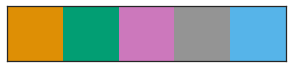

In [44]:
from operator import itemgetter
palette = itemgetter(1, 2, 4, 7, 9)(sns.color_palette('colorblind'))
sns.palplot(palette)

In [395]:
def PlotPeakCalls_Matplotlib(genomes, df_hg38, df_t2t, df_mm10, what):
    
    sns.set_style("white")
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(13, 4), layout="constrained")
    
    for i, genome in enumerate(genomes):
        if genome == "hg38":
            d = df_hg38_ints
            #n = 100000
            n = 5000
        elif genome == "t2t":
            d = df_t2t_ints
        else:
            d = df_mm10_ints
            #n = 100000
            n = 4000
        
        if what == "number":
            col1 = 'num_peaks_fithichip'
            col2 = 'num_peaks_hichip_peaks'
            title = 'Number of Peaks'
        elif what == "size":
            col1 = 'avg_peak_size_fithichip'
            col2 = 'avg_peak_size_hichip_peaks'
            title = "Peak Size (bp)"
        
        columns = ['sample_name', col1]
        fi_num_df = d[columns]
        fi_num_df = fi_num_df.loc[fi_num_df[col1] > 0].reset_index(drop=True)
        num_fi_samples = len(fi_num_df)
        fi_num_df = fi_num_df.loc[fi_num_df[col1] <= n].reset_index(drop=True)
        fi_num_df.columns = ['Tool', title]
        fi_num_df = fi_num_df.assign(Tool='FitHiChIP\n{s} samples\nmedian = {m}'.format(s = num_fi_samples, m = int(np.median(list(fi_num_df[title])))))
        num_zero_peaks_f = len(d.loc[d[col1] == 0])
        num_na_peaks_f = len(d.loc[d[col1] == -1])
        num_value_f = len(d) - num_zero_peaks_f - num_na_peaks_f

        columns = ['sample_name', col2]
        ch_num_df = d[columns]
        ch_num_df = ch_num_df.loc[ch_num_df[col2] > 0].reset_index(drop=True)
        num_ch_samples = len(ch_num_df)
        ch_num_df = ch_num_df.loc[ch_num_df[col2] <= n].reset_index(drop=True)
        ch_num_df.columns = ['Tool', title]
        ch_num_df = ch_num_df.assign(Tool='HiChIP-Peaks\n{s} samples\nmedian = {m}'.format(s = num_ch_samples, m = int(np.median(list(ch_num_df[title])))))
        num_zero_peaks_c = len(d.loc[d[col2] == 0])
        num_na_peaks_c = len(d.loc[d[col2] == -1])
        num_value_c = len(d) - num_zero_peaks_c - num_na_peaks_c

        num_df = pd.concat([fi_num_df, ch_num_df], ignore_index=True)
        
        #axs[i].text(0.66, 0.89, 'median (FT) = {}'.format(int(np.median(list(fi_num_df["Number of Peaks"])))), transform=axs[i].transAxes)
        #axs[i].text(0.66, 0.81, 'median (HP) = {}'.format(int(np.median(list(ch_num_df["Number of Peaks"])))), transform=axs[i].transAxes)
        axs[i].title.set_text(genome)
        sns.violinplot(data=num_df, x="Tool", y=title, cut=0, ax = axs[i], palette=itemgetter(0,3)(palette), linewidth=0.8)
        
    #fig.suptitle('HiChIP-Inferred Peaks', size=16)
    fig.savefig("figures/manuscript/hichip-inferred_size_peaks", dpi=1000, bbox_inches='tight')

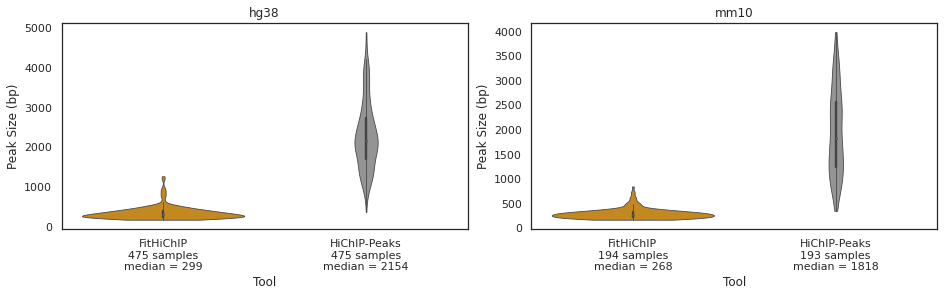

In [396]:
PlotPeakCalls_Matplotlib(["hg38", "mm10"], df_hg38_ints, df_t2t_ints, df_mm10_ints, "size")

In [442]:
def PlotPeakCalls_Matplotlib(genomes, df_hg38, df_t2t, df_mm10, what):
    
    sns.set_style("white")
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 4), layout="constrained")
    
    for i, genome in enumerate(genomes):
        if genome == "hg38":
            d = df_hg38_ints
            n = float("inf")
        elif genome == "t2t":
            d = df_t2t_ints
            n = float("inf")
        else:
            d = df_mm10_ints
            n = float("inf")
            
        if what == "number":
            col1 = 'num_peaks_fithichip'
            col2 = 'num_peaks_chipseq'
            title = 'Number of Peaks'
        elif what == "size":
            col1 = 'avg_peak_size_fithichip'
            col2 = 'avg_peak_size_chipseq'
            title = "Peak Size (bp)"
        
        columns = ['sample_name', col1]
        fi_num_df = d[columns]
        fi_num_df = fi_num_df.loc[fi_num_df[col1] > 0].reset_index(drop=True)
        num_fi_samples = len(fi_num_df)
        fi_num_df = fi_num_df.loc[fi_num_df[col1] <= n].reset_index(drop=True)
        fi_num_df.columns = ['Tool', title]
        fi_num_df = fi_num_df.assign(Tool='FitHiChIP\n{s} samples\nmedian = {m}'.format(s = len(fi_num_df), m = int(np.median(list(fi_num_df[title])))))
        num_zero_peaks_f = len(d.loc[d[col1] == 0])
        num_na_peaks_f = len(d.loc[d[col1] == -1])
        num_value_f = len(d) - num_zero_peaks_f - num_na_peaks_f

        columns = ['sample_name', col2]
        ch_num_df = d[columns]
        ch_num_df = ch_num_df.loc[ch_num_df[col2] > 0].reset_index(drop=True)
        num_ch_samples = len(ch_num_df)
        ch_num_df = ch_num_df.loc[ch_num_df[col2] <= n].reset_index(drop=True)
        ch_num_df.columns = ['Tool', title]
        ch_num_df = ch_num_df.assign(Tool='ChIPLine\n{s} samples\nmedian = {m}'.format(s = len(ch_num_df), m = int(np.median(list(ch_num_df[title])))))
        num_zero_peaks_c = len(d.loc[d[col2] == 0])
        num_na_peaks_c = len(d.loc[d[col2] == -1])
        num_value_c = len(d) - num_zero_peaks_c - num_na_peaks_c

        num_df = pd.concat([fi_num_df, ch_num_df], ignore_index=True)
        
        #axs[i].text(0.04, 0.91, 'median (FT) = {}'.format(int(np.median(list(fi_num_df["Number of Peaks"])))), transform=axs[i].transAxes)
        #axs[i].text(0.04, 0.83, 'median (CP) = {}'.format(int(np.median(list(ch_num_df["Number of Peaks"])))), transform=axs[i].transAxes)
        axs[i].title.set_text(genome)
        sns.violinplot(data=num_df, x="Tool", y=title, cut=0, ax = axs[i], palette=itemgetter(0,2)(palette), linewidth=0.8)
    
    #fig.suptitle('HiChIP-Inferred Peaks vs. ChIP-seq Peaks', size=16)
    fig.savefig("figures/manuscript/hichip-inferredVchipseq_num_peaks", dpi=1000, bbox_inches='tight')    

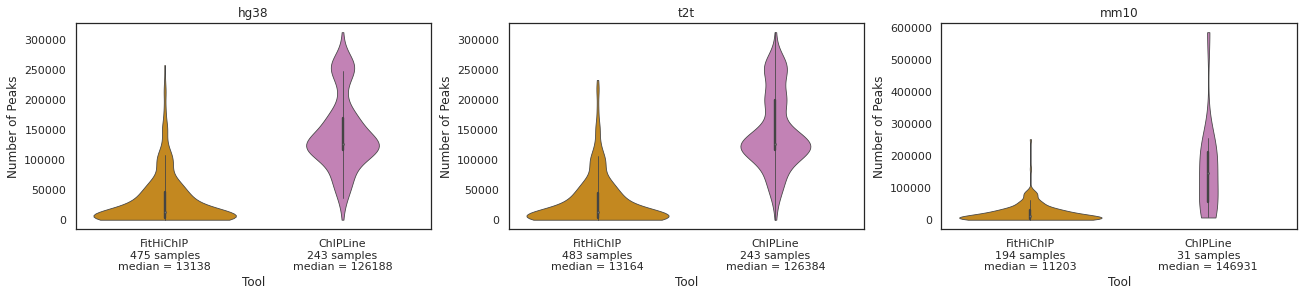

In [443]:
PlotPeakCalls_Matplotlib(["hg38", "t2t", "mm10"], df_hg38_ints, df_t2t_ints, df_mm10_ints, "number")

### % recall

In [107]:
def read_overlaps(file):
    overlaps = 0
    with open(file) as fr:
        for line in fr:
            if line.startswith('c'):
                overlaps = overlaps + 1
    return int(overlaps)

In [117]:
def create_overlaps_df(genome):
    data_f = []
    data_hp = []
    sample_files = glob.glob('results/peaks/overlaps/04_25_2023/*chipseq.' + genome + '.bed')
    samples = []
    for sample in sample_files:
        s = sample.split('/')[4].split('.chipseq')[0]
        samples.append(s)
    
    for s in samples:
        sample_name = s
        sample_info_f = []
        sample_info_hp = []
        sample_info_f.append(sample_name)
        sample_info_hp.append(sample_name)
        chipseq_file = 'results/peaks/overlaps/04_25_2023/' + sample_name + '.chipseq.' + genome + '.bed'
        num_chipseq = read_overlaps(chipseq_file)
        sample_info_f.append(num_chipseq)
        sample_info_hp.append(num_chipseq)
        
        ## get number of peaks
        hichip_peaks_path='results/peaks/hichip-peaks/{sn}/out_peaks.bed'.format(sn = sample_name)
        if os.path.exists(hichip_peaks_path):
            peak_info = read_peak_files(hichip_peaks_path)
            sample_info_hp.append(int(len(peak_info)))
        else:
            sample_info_hp.append(-1)
            
        fithichip_path='results/peaks/fithichip/{sn}/MACS2_ExtSize/out_macs2_peaks.narrowPeak'.format(sn = sample_name)
        if os.path.exists(fithichip_path):
            peak_info = read_peak_files(fithichip_path)
            sample_info_f.append(int(len(peak_info)))
        else:
            sample_info_f.append(-1)
        
        
        ## read overlaps with hp file
        hp_file = 'results/peaks/overlaps/04_25_2023/' + sample_name + '.chipseq.hichip_peaks.uniq.' + genome + '.txt'
        if os.path.exists(hp_file):
            num_overlaps = read_overlaps(hp_file)         
            sample_info_hp.append(num_overlaps)
            sample_info_hp.append((num_overlaps / num_chipseq) * 100)
        
        ## read overlaps with f file
        f_file = 'results/peaks/overlaps/04_25_2023/' + sample_name + '.chipseq.fithichip.uniq.' + genome + '.txt'
        if os.path.exists(f_file):
            num_overlaps = read_overlaps(f_file)
            sample_info_f.append(num_overlaps)
            sample_info_f.append((num_overlaps / num_chipseq) * 100)
    
        data_f.append(sample_info_f)
        data_hp.append(sample_info_hp)
            
    df_f = pd.DataFrame(data_f)
    df_hp = pd.DataFrame(data_hp)
    return df_f, df_hp

In [124]:
f_df_hg38, hp_df_hg38 = create_overlaps_df("hg38")

In [126]:
f_df_hg38.columns = ['sample_name', 'num_chipseq', "num_peaks", 'num_chipseq_by_peaks', 'per_recall_chipseq_by_peaks']
f_df_hg38 = f_df_hg38.sort_values(by=['sample_name'], ascending=True).reset_index(drop=True)
hp_df_hg38.columns = ['sample_name', 'num_chipseq', "num_peaks", 'num_chipseq_by_peaks', 'per_recall_chipseq_by_peaks']
hp_df_hg38 = hp_df_hg38.sort_values(by=['sample_name'], ascending=True).reset_index(drop=True)

f_df_hg38 = f_df_hg38.loc[f_df_hg38["num_peaks"] > 0]
hp_df_hg38 = hp_df_hg38.loc[hp_df_hg38["num_peaks"] > 0]

f_df_hg38 = f_df_hg38.assign(Tool='FitHiChIP')
hp_df_hg38 = hp_df_hg38.assign(Tool='HiChIP-Peaks')

In [127]:
f_df_hg38.describe()

,num_chipseq,num_peaks,num_chipseq_by_peaks,per_recall_chipseq_by_peaks
count,239.000000,239.000000,239.000000,239.000000
mean,143052.723849,19983.121339,13232.736402,12.865944
std,61111.211970,37901.134143,21651.647990,20.763352
min,38.000000,8.000000,8.000000,0.004716
25%,115157.000000,1566.000000,1347.500000,0.895353
50%,124318.000000,6250.000000,5223.000000,3.855575
75%,169621.000000,13791.500000,11900.500000,11.034198
max,311562.000000,211860.000000,128225.000000,97.368421


In [128]:
hp_df_hg38.describe()

,num_chipseq,num_peaks,num_chipseq_by_peaks,per_recall_chipseq_by_peaks
count,239.000000,239.000000,239.000000,239.000000
mean,143052.723849,9930.891213,14449.857741,13.838870
std,61111.211970,13236.051747,19839.638730,21.314492
min,38.000000,1.000000,1.000000,0.000590
25%,115157.000000,537.500000,705.500000,0.627237
50%,124318.000000,5675.000000,8328.000000,5.451978
75%,169621.000000,10251.500000,15080.000000,12.403403
max,311562.000000,70440.000000,109357.000000,100.000000


In [129]:
df = pd.concat([f_df_hg38, hp_df_hg38], ignore_index=True)

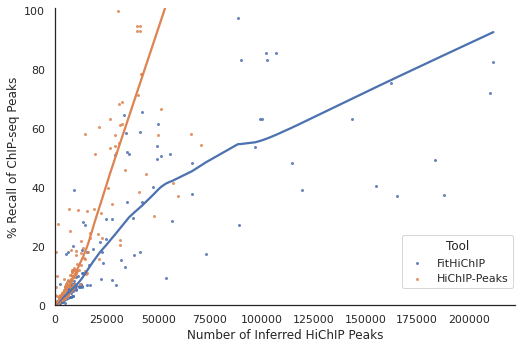

In [165]:
sns.set_style("white")
ax = sns.lmplot(x='num_peaks',y='per_recall_chipseq_by_peaks', data=df, lowess=True, ci=None, hue = "Tool", height = 5, aspect = 1.5, scatter_kws={"s": 4});
ax.set(ylim=(0, 101))
ax.set(xlim=(0, None))
ax.set_xlabels("Number of Inferred HiChIP Peaks")
ax.set_ylabels("% Recall of ChIP-seq Peaks")
sns.move_legend(ax, "lower center",bbox_to_anchor=(.73, 0.17), frameon=True)

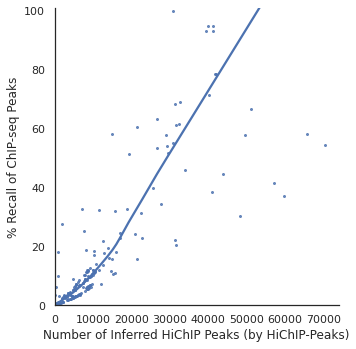

In [167]:
sns.set_style("white")
ax = sns.lmplot(x='num_hp',y='per_recall_chipseq_by_hp', data=o_df_hg38, lowess=True, ci=None, scatter_kws={"s": 4});
ax.set(ylim=(0, 101))
ax.set(xlim=(0, None))
ax.set_xlabels("Number of Inferred HiChIP Peaks (by HiChIP-Peaks)")
ax.set_ylabels("% Recall of ChIP-seq Peaks")

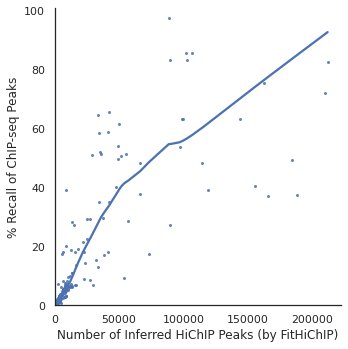

In [168]:
sns.set_style("white")
ax = sns.lmplot(x='num_f',y='per_recall_chipseq_by_f', data=o_df_hg38, lowess=True, ci=None, scatter_kws={"s": 4});
ax.set(ylim=(0, 101))
ax.set(xlim=(0, None))
ax.set_xlabels("Number of Inferred HiChIP Peaks (by FitHiChIP)")
ax.set_ylabels("% Recall of ChIP-seq Peaks")

In [470]:
def PlotPeakCalls_Matplotlib(genomes, df_hg38, df_t2t, df_mm10, what):
    
    sns.set_style("white")
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(13, 4), layout="constrained")
    
    for i, genome in enumerate(genomes):
        if genome == "hg38":
            d = df_hg38
            n = float("inf")
        elif genome == "t2t":
            d = df_t2t
            n = float("inf")
        else:
            d = df_mm10
            n = float("inf")
            
        if what == "recall":
            col1 = '%_recall_chipseq_by_f'
            col2 = '%_recall_chipseq_by_hp'
            title = 'Percent Recall of Corresponding ChIP-seq (%)'
        
        columns = ['sample_name', col1]
        fi_num_df = d[columns]
        fi_num_df = fi_num_df.loc[fi_num_df[col1] > 0].reset_index(drop=True)
        fi_num_df = fi_num_df.loc[fi_num_df[col1] <= n].reset_index(drop=True)
        fi_num_df.columns = ['Tool', title]
        fi_num_df = fi_num_df.assign(Tool='FitHiChIP\nn = {s} samples\nmedian = {m}'.format(s = len(fi_num_df), m = str(round(np.median(list(fi_num_df[title])), 2)) + "%"))
        num_zero_peaks_f = len(d.loc[d[col1] == 0])
        num_na_peaks_f = len(d.loc[d[col1] == -1])
        num_value_f = len(d) - num_zero_peaks_f - num_na_peaks_f

        columns = ['sample_name', col2]
        ch_num_df = d[columns]
        ch_num_df = ch_num_df.loc[ch_num_df[col2] > 0].reset_index(drop=True)
        ch_num_df = ch_num_df.loc[ch_num_df[col2] <= n].reset_index(drop=True)
        ch_num_df.columns = ['Tool', title]
        ch_num_df = ch_num_df.assign(Tool='HiChIP-Peaks\nn = {s} samples\nmedian = {m}'.format(s = len(ch_num_df), m = str(round(np.median(list(ch_num_df[title])), 2)) + "%"))
        num_zero_peaks_c = len(d.loc[d[col2] == 0])
        num_na_peaks_c = len(d.loc[d[col2] == -1])
        num_value_c = len(d) - num_zero_peaks_c - num_na_peaks_c

        num_df = pd.concat([fi_num_df, ch_num_df], ignore_index=True)
        
        #axs[i].text(0.04, 0.91, 'median (FT) = {}'.format(int(np.median(list(fi_num_df["Number of Peaks"])))), transform=axs[i].transAxes)
        #axs[i].text(0.04, 0.83, 'median (CP) = {}'.format(int(np.median(list(ch_num_df["Number of Peaks"])))), transform=axs[i].transAxes)
        axs[i].title.set_text(genome)
        sns.violinplot(data=num_df, x="Tool", y=title, cut=0, ax = axs[i], palette=itemgetter(0,3)(palette), linewidth=0.8)
    
    #fig.suptitle('HiChIP-Inferred Peaks vs. ChIP-seq Peaks', size=16)
    fig.savefig("figures/manuscript/hichip-inferred_recall_peaks", dpi=1000, bbox_inches='tight')    

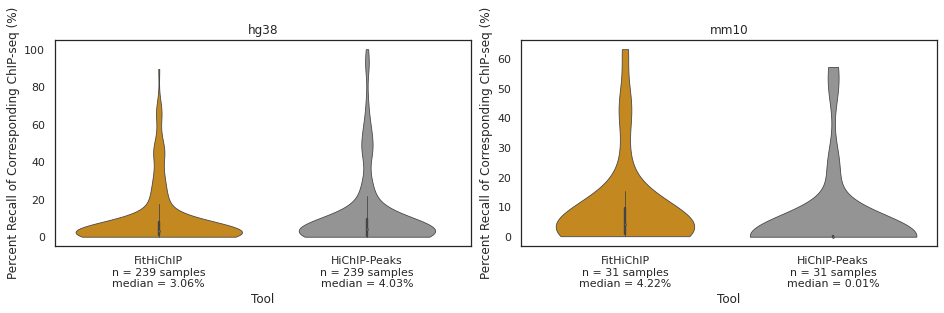

In [471]:
PlotPeakCalls_Matplotlib(["hg38", "mm10"], o_df_hg38, df_t2t, o_df_mm10, "recall")

### Old Code

In [144]:
def PlotPeakCalls(genome, df_hg38, df_t2t, df_mm10, org):

    if genome == "hg38":
        d = df_hg38_ints
    elif genome == "t2t":
        d = df_t2t_ints
    else:
        d = df_mm10_ints

    columns = ['sample_name', 'num_peaks_fithichip']
    fi_num_df = d[columns]
    fi_num_df = fi_num_df.loc[fi_num_df['num_peaks_fithichip'] != -1].reset_index(drop=True)
    fi_num_df = fi_num_df.loc[fi_num_df['num_peaks_fithichip'] != 0].reset_index(drop=True)
    fi_num_df.columns = ['Tool', 'Number of Peaks']
    fi_num_df = fi_num_df.assign(Tool='HiChIP-Inferred (FitHiChIP)')
    num_zero_peaks_f = len(d.loc[d['num_peaks_fithichip'] == 0])
    num_na_peaks_f = len(d.loc[d['num_peaks_fithichip'] == -1])
    num_value_f = len(d) - num_zero_peaks_f - num_na_peaks_f

    columns = ['sample_name', 'num_peaks_hichip_peaks']
    ch_num_df = d[columns]
    ch_num_df = ch_num_df.loc[ch_num_df['num_peaks_hichip_peaks'] != -1].reset_index(drop=True)
    ch_num_df = ch_num_df.loc[ch_num_df['num_peaks_hichip_peaks'] != 0].reset_index(drop=True)
    ch_num_df.columns = ['Tool', 'Number of Peaks']
    ch_num_df = ch_num_df.assign(Tool='HiChIP-Inferred (HiChIP-Peaks)')
    num_zero_peaks_c = len(d.loc[d['num_peaks_hichip_peaks'] == 0])
    num_na_peaks_c = len(d.loc[d['num_peaks_hichip_peaks'] == -1])
    num_value_c = len(d) - num_zero_peaks_c - num_na_peaks_c

    num_df = pd.concat([fi_num_df, ch_num_df], ignore_index=True)
    
    palette = ["#a1c9f4", '#d0bbff']
    sns.set_style("white")
    #sns.set_palette("pastel")
    ax = sns.violinplot(data=num_df, x="Tool", y="Number of Peaks", cut=0, palette=sns.color_palette(palette, 2))
    ax.set(title=org + " " + genome, xlabel='Peak Type', ylabel='Number of Peaks Called')
    
    textstr = '\n'.join((
    "HiChIP-Inferred (FitHiChIP):", 
    "Non-Zero Peaks" + r'$=%.0f$' % (num_value_f, ),
    "Zero Peaks" + r'$=%.0f$' % (num_zero_peaks_f, ),
     '\n',
    "HiChIP-Inferred (HiChIP-Peaks):",
    "Non-Zero Peaks" + r'$=%.0f$' % (num_value_c, ),
    "Zero Peaks" + r'$=%.0f$' % (num_zero_peaks_c, ),))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax.text(1.05, 0.95, textstr, transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=props)
    fig = ax.get_figure()
    #fig.savefig(org + " " + genome, dpi=1000, bbox_inches='tight')
    
    #return fi_num_df, num_zero_peaks_f, num_na_peaks_f, num_value_f, num_zero_peaks_c, num_na_peaks_c, num_value_c

In [48]:
pal = sns.color_palette("pastel")
pal.as_hex()

['#a1c9f4',
 '#ffb482',
 '#8de5a1',
 '#ff9f9b',
 '#d0bbff',
 '#debb9b',
 '#fab0e4',
 '#cfcfcf',
 '#fffea3',
 '#b9f2f0']

In [49]:
print(pal.as_hex())

['#a1c9f4', '#ffb482', '#8de5a1', '#ff9f9b', '#d0bbff', '#debb9b', '#fab0e4', '#cfcfcf', '#fffea3', '#b9f2f0']


#### FitHiChIP vs. ChIP-seq

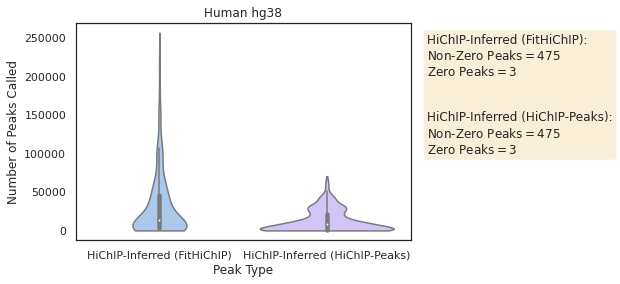

In [50]:
PlotPeakCalls("hg38", df_hg38_ints, df_t2t_ints, df_mm10_ints, "Human")

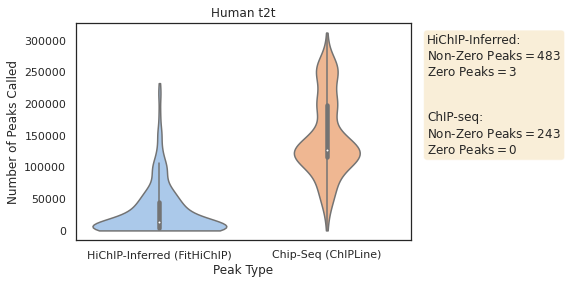

In [268]:
PlotPeakCalls("t2t", df_hg38, df_t2t, df_mm10, "Human")

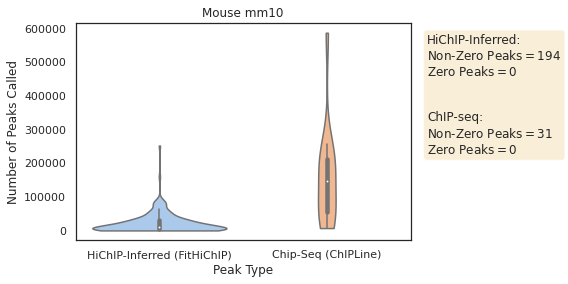

In [269]:
PlotPeakCalls("mm10", df_hg38, df_t2t, df_mm10, "Mouse")

#### FitHiChIP vs. HiChIP-Peaks

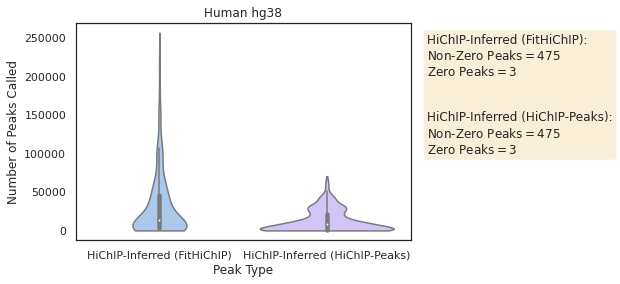

In [38]:
PlotPeakCalls("hg38", df_hg38, df_t2t, df_mm10, "Human")

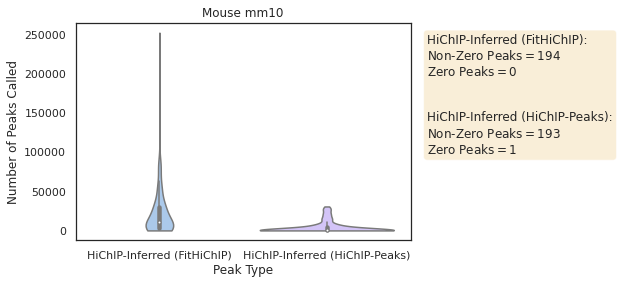

In [41]:
PlotPeakCalls("mm10", df_hg38, df_t2t, df_mm10, "Mouse")

# Generate Sample-Specific Plots

#### peak sizes

In [33]:
def get_outliers(ps_df):
    
    Q1 = ps_df['peak_sizes_bp'].quantile(0.25)
    Q3 = ps_df['peak_sizes_bp'].quantile(0.75)
    IQR = Q3 - Q1
    lower_lim = Q1 - 1.5 * IQR
    upper_lim = Q3 + 1.5 * IQR
    print("Outliers Report")
    print("IQR:", IQR)
    
    outliers_low = ps_df.peak_sizes_bp < lower_lim
    outliers_high = ps_df.peak_sizes_bp > upper_lim
    outliers_low_df = ps_df.loc[outliers_low,:]
    outliers_high_df = ps_df.loc[outliers_high,:]
    print("num_outliers_low:", len(outliers_low_df))
    print("num_outliers_high:", len(outliers_high_df))
    print("percent_total_peaks_that_are_outliers:", round(((len(outliers_high_df) + len(outliers_low_df)) / len(ps_df) * 100), 2), "%")
    
    ps_df_no_outliers = ps_df[~(outliers_low | outliers_high)]
    
    return ps_df_no_outliers

In [34]:
def gen_peak_sizes_plot(sample_name, peak_type):
    
    if peak_type == "FitHiChIP": 
        peaks_path = 'results/peaks/fithichip/{sn}/MACS2_ExtSize/out_macs2_peaks.narrowPeak'.format(sn = sample_name)
    if peak_type == "HiChIP_Peaks":
        peaks_path = 'results/peaks/hichip-peaks/{sn}/out_peaks.bed'.format(sn = sample_name)
    if peak_type == "ChIP_Seq":
        peaks_path = get_chipseq_path('results/samplesheets/post-hicpro/human_updated_0314.peaks_files.samplesheet.without_header.tsv', sample_name)
        
    if os.path.exists(peaks_path):
        if peak_type == "FithiChIP" or peak_type == "HiChIP_Peaks": 
            peak_info = read_peak_files(peaks_path)    
        else:
            peak_info = read_chipseq_files(peaks_path)
            
        peak_sizes = []
        for peak in peak_info.items():
            peak_sizes.append(int(int(peak[1][2])-int(peak[1][1])))
        ps_df = pd.DataFrame(peak_sizes)
        ps_df.columns = ['peak_sizes_bp']
        
    print("Peak Sizes Report (before outliers dropped)")
    print(ps_df.describe())
    print()
    
    ps_df_no_outliers = get_outliers(ps_df)
    
    sns.set(rc = {'figure.figsize':(25,8)})
    sns.set_theme(style="whitegrid")
    font1 = {'color':'black','size':20}
    font2 = {'color':'black','size':15}
    plt.title(peak_type + " Peak Sizes Distribution: " + sample_name + " (Outliers Dropped)", fontdict = font1)
    plt.xlabel("Peak Size (bp)", fontdict = font2)
    plt.ylabel("Number of Samples", fontdict = font2)

    ps_plot = sns.histplot(data=ps_df_no_outliers, bins=100, x="peak_sizes_bp", color='#fa8072')
    fig = ps_plot.get_figure()
    fig.savefig('sample_peak_dist2.png', dpi=300)
    return ps_plot

Peak Sizes Report (before outliers dropped)
       peak_sizes_bp
count   51221.000000
mean     3132.609535
std      3013.077518
min         7.000000
25%      1467.000000
50%      2421.000000
75%      3813.000000
max     78049.000000

Outliers Report
IQR: 2346.0
num_outliers_low: 0
num_outliers_high: 3141
percent_total_peaks_that_are_outliers: 6.13 %


<AxesSubplot:title={'center':'HiChIP_Peaks Peak Sizes Distribution: Aortic-VIC.GSE154513.Homo_Sapiens.H3K27ac.b1 (Outliers Dropped)'}, xlabel='Peak Size (bp)', ylabel='Number of Samples'>

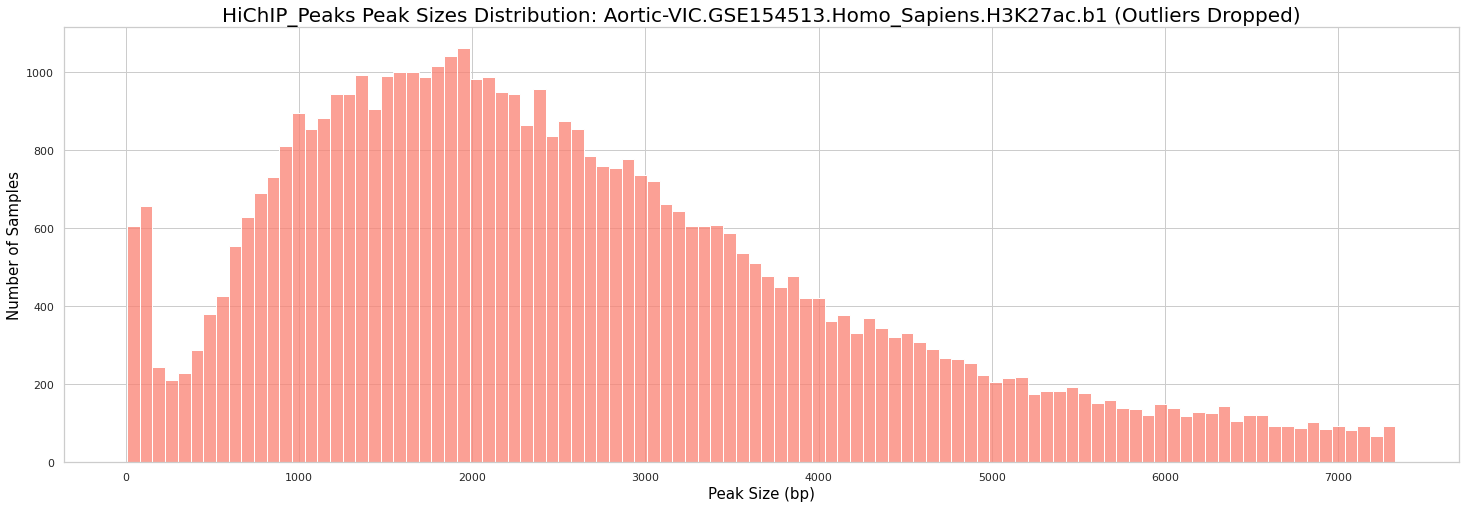

In [35]:
gen_peak_sizes_plot('Aortic-VIC.GSE154513.Homo_Sapiens.H3K27ac.b1', 'HiChIP_Peaks')

Peak Sizes Report (before outliers dropped)
       peak_sizes_bp
count  210112.000000
mean      388.569696
std       341.728160
min       147.000000
25%       179.000000
50%       250.000000
75%       440.000000
max      3959.000000

Outliers Report
IQR: 261.0
num_outliers_low: 0
num_outliers_high: 21286
percent_total_peaks_that_are_outliers: 10.13 %


<AxesSubplot:title={'center':'FitHiChIP Peak Sizes Distribution: Aortic-VIC.GSE154513.Homo_Sapiens.H3K27ac.b1 (Outliers Dropped)'}, xlabel='Peak Size (bp)', ylabel='Number of Samples'>

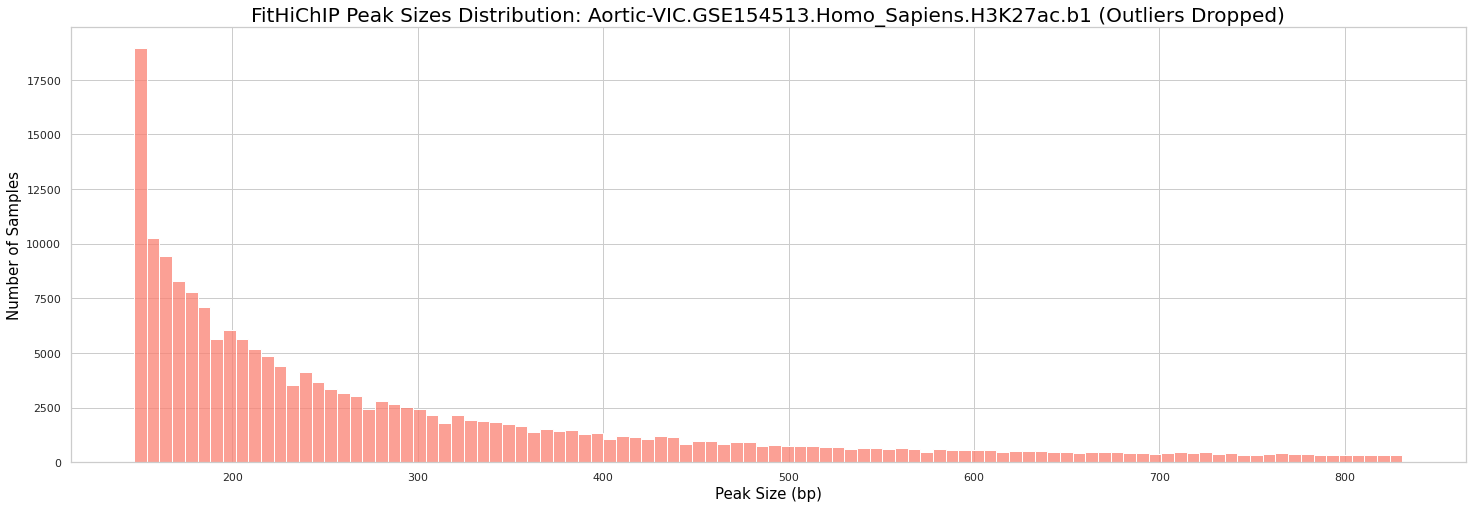

In [36]:
gen_peak_sizes_plot('Aortic-VIC.GSE154513.Homo_Sapiens.H3K27ac.b1', 'FitHiChIP')

Peak Sizes Report (before outliers dropped)
       peak_sizes_bp
count  163779.000000
mean      657.534684
std       753.876251
min       200.000000
25%       252.000000
50%       384.000000
75%       726.000000
max     26766.000000

Outliers Report
IQR: 474.0
num_outliers_low: 0
num_outliers_high: 16518
percent_total_peaks_that_are_outliers: 10.09 %


<AxesSubplot:title={'center':'ChIP_Seq Peak Sizes Distribution: Aortic-VIC.GSE154513.Homo_Sapiens.H3K27ac.b1 (Outliers Dropped)'}, xlabel='Peak Size (bp)', ylabel='Number of Samples'>

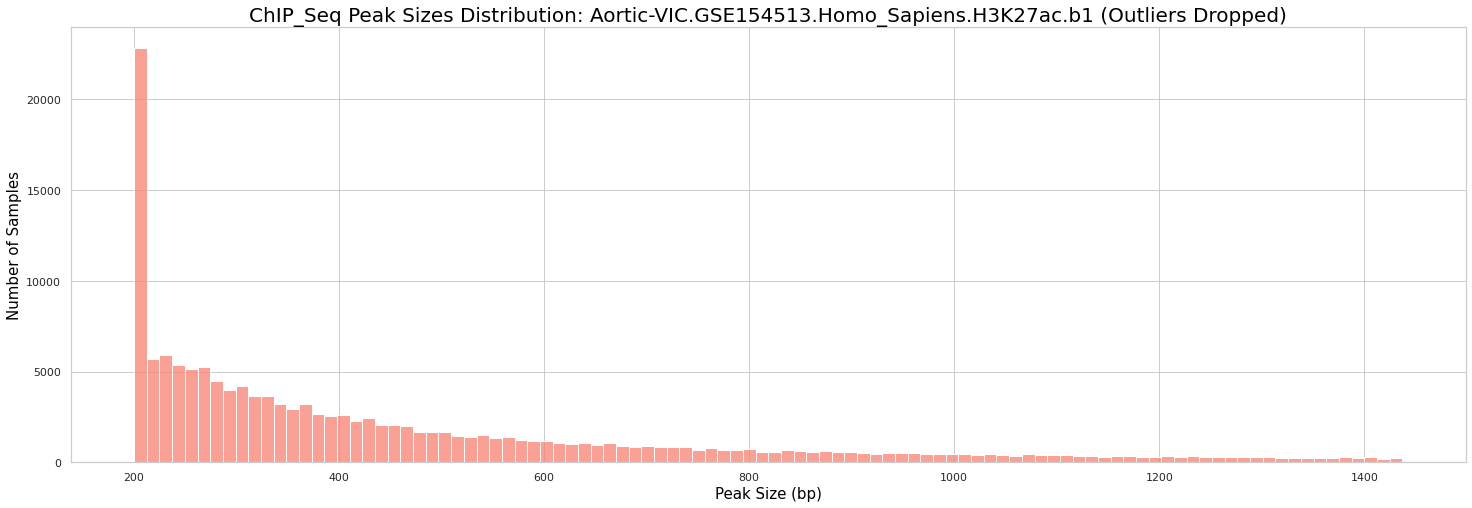

In [37]:
gen_peak_sizes_plot('Aortic-VIC.GSE154513.Homo_Sapiens.H3K27ac.b1', 'ChIP_Seq')

#### overlaps, percent recall

In [87]:
def read_overlaps(file):
    overlaps = 0
    with open(file) as fr:
        for line in fr:
            if line.startswith('c'):     
                info = line.strip().split()
                overlaps = overlaps + 1
    return overlaps

In [88]:
def create_overlaps_df():
    data = []
    sample_files = glob.glob('results/peaks/overlaps/no_slop_recall/*')
    samples = []
    for sample in sample_files:
        s = sample.split('/')[4].split('.overlaps')[0]
        if s not in samples:
            samples.append(s)
    
    for s in samples:
        sample_name = s
        sample_info = []
        sample_info.append(sample_name)
        chipseq_file = get_chipseq_path('results/samplesheets/post-hicpro/peaks_files.samplesheet.without_header.tsv', sample_name)
        
        ## read overlaps with hp file
        hp_file = 'results/peaks/overlaps/no_slop_recall/{sn}.overlaps.chipseq.hp.nodups.txt'.format(sn = sample_name)
        if os.path.exists(hp_file):
            num_overlaps = read_overlaps(hp_file)
            num_chipseq_peaks = read_overlaps(chipseq_file)
            
            sample_info.append(num_overlaps)
            sample_info.append(num_chipseq_peaks)
            sample_info.append((num_overlaps / num_chipseq_peaks) * 100)
        
        ## read overlaps with f file
        f_file = 'results/peaks/overlaps/no_slop_recall/{sn}.overlaps.chipseq.f.nodups.txt'.format(sn = sample_name)
        if os.path.exists(f_file):
            num_overlaps = read_overlaps(f_file)
            
            sample_info.append(num_overlaps)
            sample_info.append(num_chipseq_peaks)
            sample_info.append((num_overlaps / num_chipseq_peaks) * 100)
        
        data.append(sample_info)
            
    df = pd.DataFrame(data)
    return df

In [ ]:
o_df = create_overlaps_df()

In [95]:
o_df.columns = ['sample_name', 'num_csp_w_hp_overlap', 'num_csp', '%_recall_hp_csp', 'num_csp_w_f_overlap', 'num_csp', '%_recall_f_csp']
o_df = o_df.sort_values(by=['sample_name'], ascending=True).reset_index(drop=True)
o_df.describe()

,num_csp_w_hp_overlap,num_csp,%_recall_hp_csp,num_csp_w_f_overlap,num_csp,%_recall_f_csp
count,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000
mean,7941.550847,98072.864407,14.012254,6707.076271,98072.864407,13.038284
std,15290.704274,50247.273696,26.015760,12970.841804,50247.273696,24.492064
min,0.000000,38.000000,0.000000,0.000000,38.000000,0.000000
25%,286.000000,61173.000000,0.363033,420.250000,61173.000000,0.371993
50%,2791.500000,99593.000000,3.117808,1252.000000,99593.000000,1.700240
75%,5534.500000,136321.000000,8.245904,5342.250000,136321.000000,10.013001
max,96306.000000,311562.000000,100.000000,75469.000000,311562.000000,98.108313


Text(0, 0.5, 'Percent Recall of ChIP-Seq Peaks by HiChIP-Peaks')

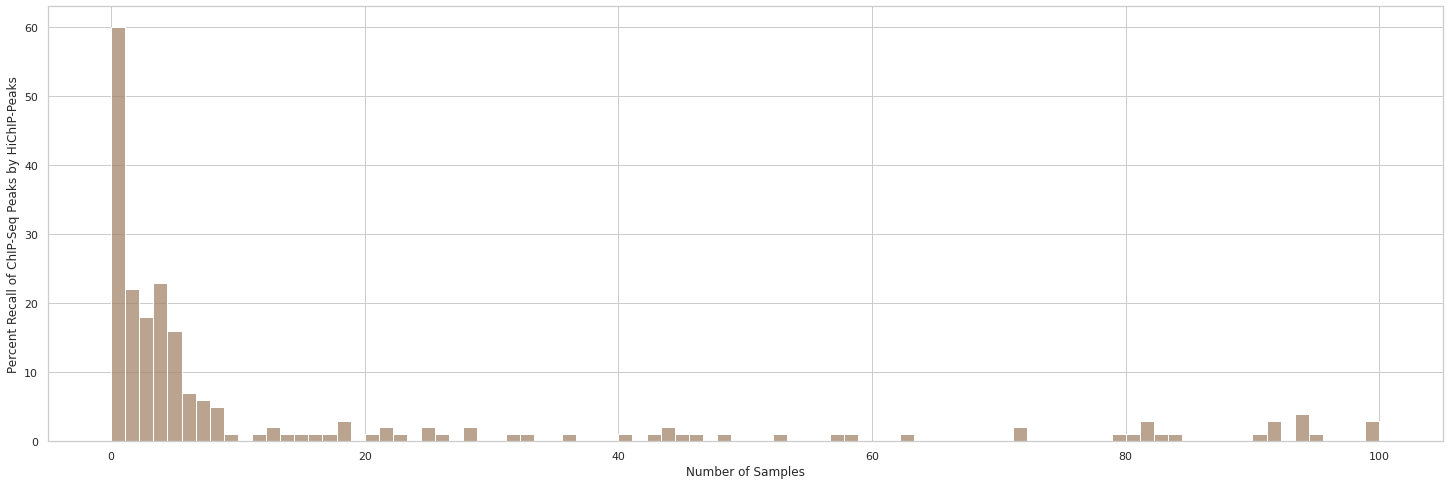

In [69]:
sns.set(rc = {'figure.figsize':(25,8)})
sns.set_theme(style="whitegrid")
ax = sns.histplot(data=o_df, bins=90, x="%_recall_hp_csp", color='#A3866A')
ax.set_xlabel('Number of Samples')
ax.set_ylabel('Percent Recall of ChIP-Seq Peaks by HiChIP-Peaks')

Text(0, 0.5, 'Percent Recall of ChIP-Seq Peaks by FitHiChIP')

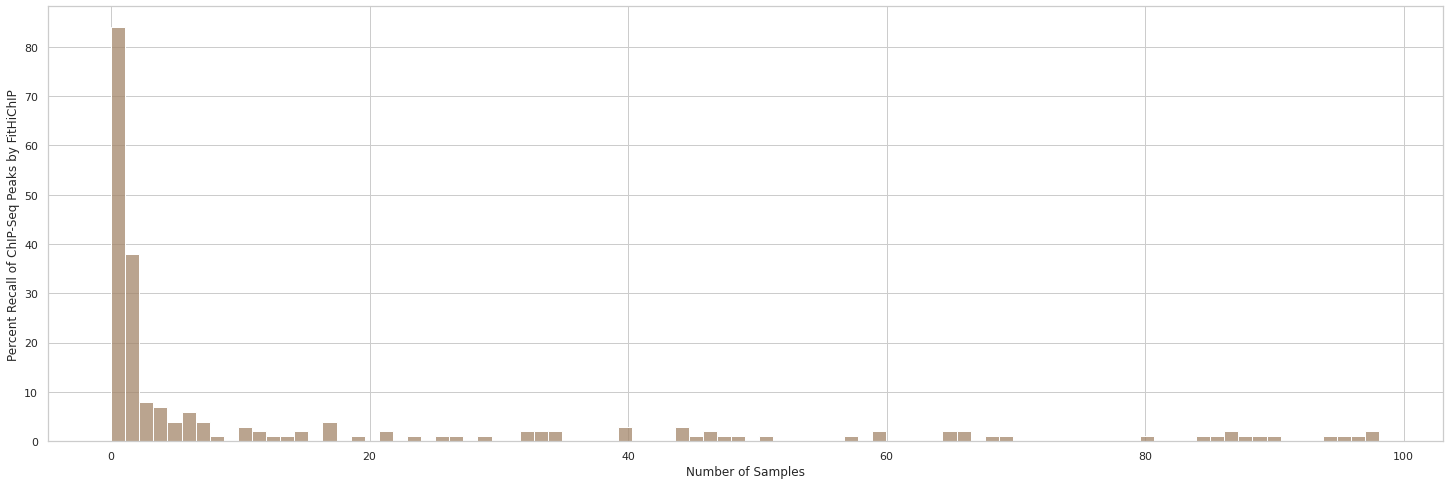

In [71]:
sns.set(rc = {'figure.figsize':(25,8)})
sns.set_theme(style="whitegrid")
ax = sns.histplot(data=o_df, bins=90, x="%_recall_f_csp", color='#A3866A')
ax.set_xlabel('Number of Samples')
ax.set_ylabel('Percent Recall of ChIP-Seq Peaks by FitHiChIP')

In [71]:
df

,sample_name,num_peaks_hichip_peaks,avg_peak_size_hichip_peaks,num_peaks_fithichip,avg_peak_size_fithichip,num_peaks_chipseq,avg_peak_size_chipseq,chipseq_path
0,293T-PDS.GSE128106.Homo_Sapiens.YY1.b1,968,18837.628099,29430,174.444852,90971,547.053676,293T-PDS.GSE128106.Homo_Sapiens.YY1.b2.macs2_peaks.narrowPeak_Q0.01filt
1,293T-TMPYP4.GSE128106.Homo_Sapiens.YY1.b1,1801,29690.376458,73184,187.952298,93587,549.467747,293T-TMPYP4.GSE128106.Homo_Sapiens.YY1.b2.macs2_peaks.narrowPeak_Q0.01filt
2,293T.GSE128106.Homo_Sapiens.YY1.b1,43,21189.976744,987,183.697062,119725,500.863337,293T.GSE128106.Homo_Sapiens.YY1.b2.macs2_peaks.narrowPeak_Q0.01filt
3,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,2661,1281.321308,11489,265.430151,115154,630.902669,A673-siCT-Dh1-72h.GSE156650.Homo_Sapiens.CTCF.b1.macs2_peaks.narrowPeak_Q0.01filt
4,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,3468,1323.91436,10428,255.292386,115154,630.902669,A673-siCT-Dh1-72h.GSE156650.Homo_Sapiens.CTCF.b1.macs2_peaks.narrowPeak_Q0.01filt
5,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,823,1086.36695,7761,265.823734,102935,615.880789,A673-siSA2-Dh6-72h.GSE156650.Homo_Sapiens.CTCF.b1.macs2_peaks.narrowPeak_Q0.01filt
6,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,2205,1375.680726,23228,247.107327,102935,615.880789,A673-siSA2-Dh6-72h.GSE156650.Homo_Sapiens.CTCF.b1.macs2_peaks.narrowPeak_Q0.01filt
7,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,49,2554.061224,9018,207.311377,104318,601.596963,A673-siSA2-Dh8-72h.GSE156650.Homo_Sapiens.CTCF.b1.macs2_peaks.narrowPeak_Q0.01filt
8,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,46,1515.434783,27484,216.063164,104318,601.596963,A673-siSA2-Dh8-72h.GSE156650.Homo_Sapiens.CTCF.b1.macs2_peaks.narrowPeak_Q0.01filt
9,A673_SA1m1.GSE133227.Homo_Sapiens.CTCF.b1,29585,2240.566571,60295,386.202189,na,na,N/A


In [73]:
df.loc[df["num_peaks_fithichip"] == 0]

,sample_name,num_peaks_hichip_peaks,avg_peak_size_hichip_peaks,num_peaks_fithichip,avg_peak_size_fithichip,num_peaks_chipseq,avg_peak_size_chipseq,chipseq_path
337,Nonclassical_Monocyte_1816.phs001703v4p1.Homo_Sapiens.H3K27ac.b2,0,NaN,0,NaN,169621,882.327813,Nonclassical_Monocyte_merged_donors_hg38.phs001703v4p1.Homo_Sapiens.H3K27ac.b1.macs2_peaks.narrowPeak_Q0.01filt
338,Nonclassical_Monocyte_1816.phs001703v4p1.Homo_Sapiens.H3K27ac.b3,0,NaN,0,NaN,169621,882.327813,Nonclassical_Monocyte_merged_donors_hg38.phs001703v4p1.Homo_Sapiens.H3K27ac.b1.macs2_peaks.narrowPeak_Q0.01filt
339,Nonclassical_Monocyte_1816.phs001703v4p1.Homo_Sapiens.H3K27ac.b4,0,NaN,0,NaN,169621,882.327813,Nonclassical_Monocyte_merged_donors_hg38.phs001703v4p1.Homo_Sapiens.H3K27ac.b1.macs2_peaks.narrowPeak_Q0.01filt


# Plotting

In [46]:
df

,sample_name,num_peaks_hichip_peaks,avg_peak_size_hichip_peaks,num_peaks_fithichip,avg_peak_size_fithichip,num_peaks_chipseq,avg_peak_size_chipseq,chipseq_path
0,293T-PDS.GSE128106.Homo_Sapiens.YY1.b1,na,na,29904,174.480972,91301,543.983516,293T-PDS.GSE128106.Homo_Sapiens.YY1.b2.macs2_peaks.narrowPeak_Q0.01filt
1,293T-TMPYP4.GSE128106.Homo_Sapiens.YY1.b1,na,na,74311,188.027708,93849,549.217253,293T-TMPYP4.GSE128106.Homo_Sapiens.YY1.b2.macs2_peaks.narrowPeak_Q0.01filt
2,293T.GSE128106.Homo_Sapiens.YY1.b1,na,na,1003,181.174477,119594,505.284462,293T.GSE128106.Homo_Sapiens.YY1.b2.macs2_peaks.narrowPeak_Q0.01filt
3,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,na,na,11369,265.514117,115054,631.098658,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1.macs2_peaks.narrowPeak_Q0.01filt
4,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,na,na,10285,255.936315,115054,631.098658,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1.macs2_peaks.narrowPeak_Q0.01filt
5,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,na,na,7653,265.445838,102853,616.308751,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1.macs2_peaks.narrowPeak_Q0.01filt
6,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,na,na,23178,247.086548,102853,616.308751,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1.macs2_peaks.narrowPeak_Q0.01filt
7,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,na,na,8772,206.776106,104080,601.632571,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1.macs2_peaks.narrowPeak_Q0.01filt
8,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,na,na,27647,216.251384,104080,601.632571,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1.macs2_peaks.narrowPeak_Q0.01filt
9,A673_SA1m1.GSE133227.Homo_Sapiens.CTCF.b1,na,na,60043,390.155039,na,na,N/A


In [80]:
# Generate df of avg peak sizes by tool
#hp_plot_df = df.loc[df['avg_peak_size_hichip_peaks'] > 0].reset_index(drop=True)
#columns = ['sample_name', 'avg_peak_size_hichip_peaks']
#hp_plot_df = hp_plot_df[columns]
#hp_plot_df.columns = ['Tool', 'Average Peak Size (bp)']
#hp_plot_df = hp_plot_df.assign(Tool='HiChIP-Peaks')

fi_plot_df = df.loc[df['avg_peak_size_fithichip'].str.contains("na")].reset_index(drop=True)
columns = ['sample_name', 'avg_peak_size_fithichip']
fi_plot_df = fi_plot_df[columns]
fi_plot_df.columns = ['Tool', 'Average Peak Size (bp)']
fi_plot_df = fi_plot_df.assign(Tool='FitHiChIP')

ch_plot_df = df.loc[df['avg_peak_size_chipseq'].str.contains("na")].reset_index(drop=True)
columns = ['sample_name', 'avg_peak_size_chipseq']
ch_plot_df = ch_plot_df[columns]
ch_plot_df.columns = ['Tool', 'Average Peak Size (bp)']
ch_plot_df = ch_plot_df.assign(Tool='ChIPLine (Chip-Seq)')

plot_df = pd.concat([hp_plot_df, fi_plot_df, ch_plot_df], ignore_index=True)

ValueError: Cannot mask with non-boolean array containing NA / NaN values

In [49]:
# Generate df of number of peaks by tool
#hp_num_df = df.loc[df['num_peaks_hichip_peaks'] > 0].reset_index(drop=True)
#columns = ['sample_name', 'num_peaks_hichip_peaks']
#hp_num_df = hp_num_df[columns]
#hp_num_df.columns = ['Tool', 'Number of Peaks']
#hp_num_df = hp_num_df.assign(Tool='HiChIP-Peaks')

fi_num_df = df.loc[df['num_peaks_fithichip'] > 0].reset_index(drop=True)
columns = ['sample_name', 'num_peaks_fithichip']
fi_num_df = fi_num_df[columns]
fi_num_df.columns = ['Tool', 'Number of Peaks']
fi_num_df = fi_num_df.assign(Tool='FitHiChIP')

ch_num_df = df.loc[df['num_peaks_chipseq'] > 0].reset_index(drop=True)
columns = ['sample_name', 'num_peaks_chipseq']
ch_num_df = ch_num_df[columns]
ch_num_df.columns = ['Tool', 'Number of Peaks']
ch_num_df = ch_num_df.assign(Tool='ChIPLine (Chip-Seq)')

num_df = pd.concat([fi_num_df, ch_num_df], ignore_index=True)

In [50]:
# concatenate the above two dfs
com_df = num_df.join(plot_df['Average Peak Size (bp)'])
hichip_peaks = com_df.loc[com_df['Tool'] == 'HiChIP-Peaks']
fithichip = com_df.loc[com_df['Tool'] == 'FitHiChIP']
chipseq = com_df.loc[com_df['Tool'] == 'ChIPLine (Chip-Seq)']
com_df

,Tool,Number of Peaks,Average Peak Size (bp)
0,FitHiChIP,29430,18837.628099
1,FitHiChIP,73184,29690.376458
2,FitHiChIP,987,21189.976744
3,FitHiChIP,11489,1281.321308
4,FitHiChIP,10428,1323.914360
5,FitHiChIP,7761,1086.366950
6,FitHiChIP,23228,1375.680726
7,FitHiChIP,9018,2554.061224
8,FitHiChIP,27484,1515.434783
9,FitHiChIP,60295,2240.566571


In [58]:
len(com_df.loc[com_df["Tool"].str.contains("FitHiChIP")])

475

<AxesSubplot:xlabel='Tool', ylabel='Average Peak Size (bp)'>

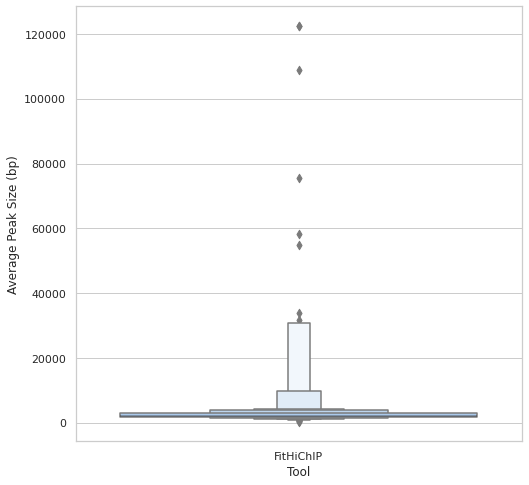

In [51]:
sns.boxenplot(x="Tool", y="Average Peak Size (bp)", data=fithichip, palette="pastel")

<AxesSubplot:xlabel='Tool', ylabel='Average Peak Size (bp)'>

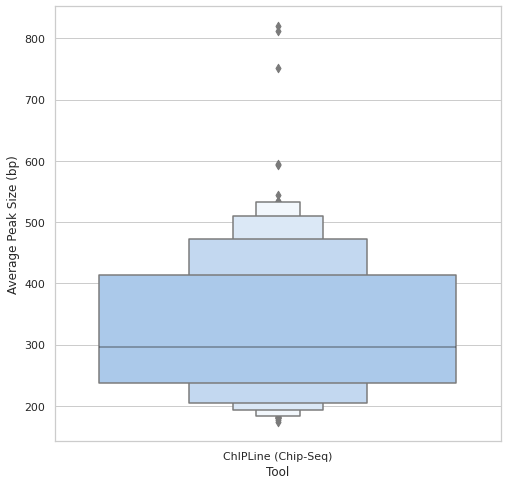

In [52]:
sns.boxenplot(x="Tool", y="Average Peak Size (bp)", data=chipseq, palette="pastel")

<AxesSubplot:xlabel='Tool', ylabel='Average Peak Size (bp)'>

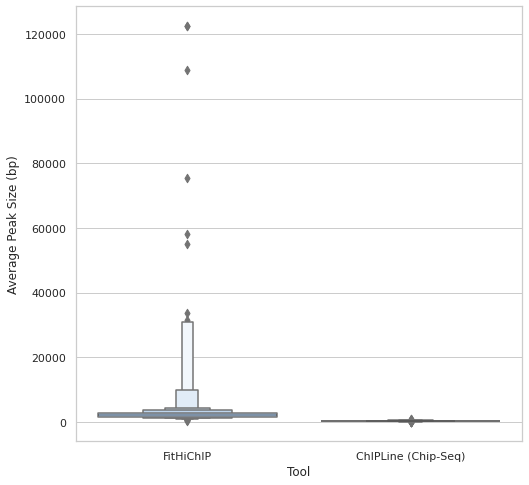

In [53]:
sns.set(rc = {'figure.figsize':(8,8)})
sns.set_theme(style="whitegrid")
sns.boxenplot(x="Tool", y="Average Peak Size (bp)", data=com_df, palette="pastel")

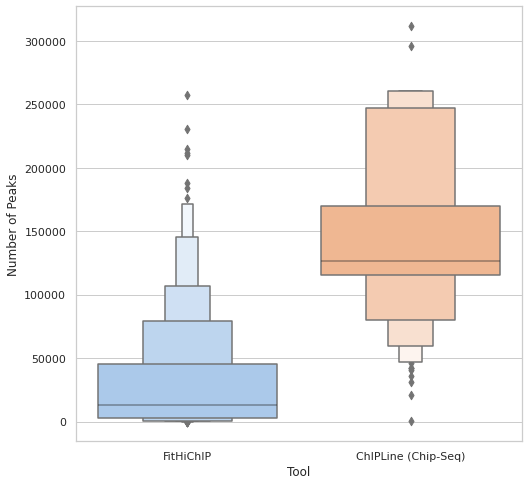

In [54]:
sns.set(rc = {'figure.figsize':(8,8)})
sns.set_theme(style="whitegrid")
ax = sns.boxenplot(x="Tool", y="Number of Peaks", data=com_df, palette="pastel")
fig = ax.get_figure()
fig.savefig('num_of_peaks.png', dpi=300)

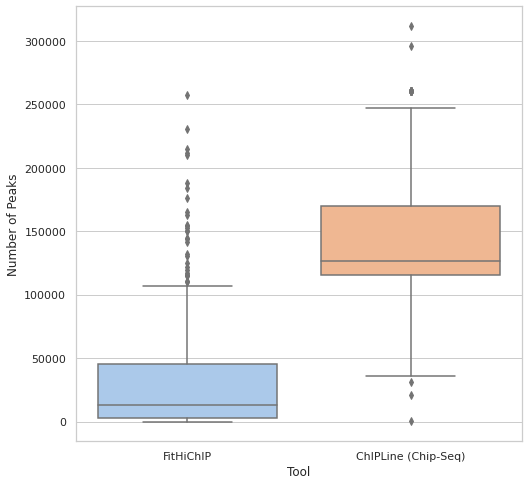

In [55]:
sns.set(rc = {'figure.figsize':(8,8)})
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="Tool", y="Number of Peaks", data=com_df, palette="pastel")
fig = ax.get_figure()
fig.savefig('num_of_peaks.png', dpi=300)

<AxesSubplot:xlabel='Number of Peaks', ylabel='Count'>

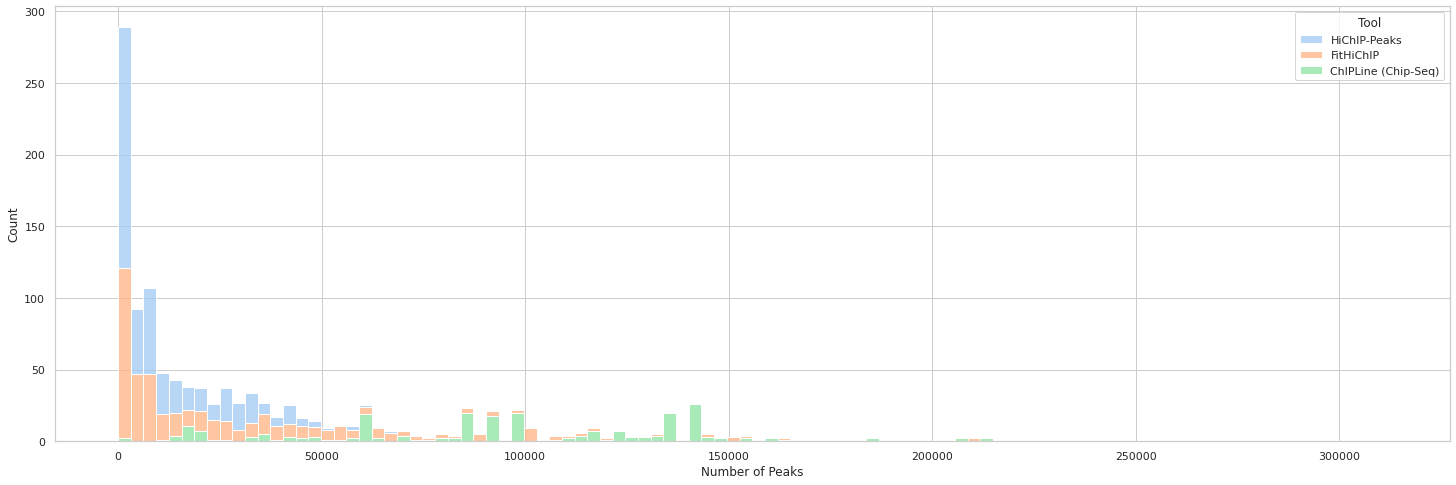

In [84]:
sns.set(rc = {'figure.figsize':(25,8)})
sns.set_theme(style="whitegrid")
sns.histplot(data=com_df, bins=100, x="Number of Peaks", hue='Tool', multiple="stack", palette='pastel')

<AxesSubplot:xlabel='Number of Peaks', ylabel='Count'>

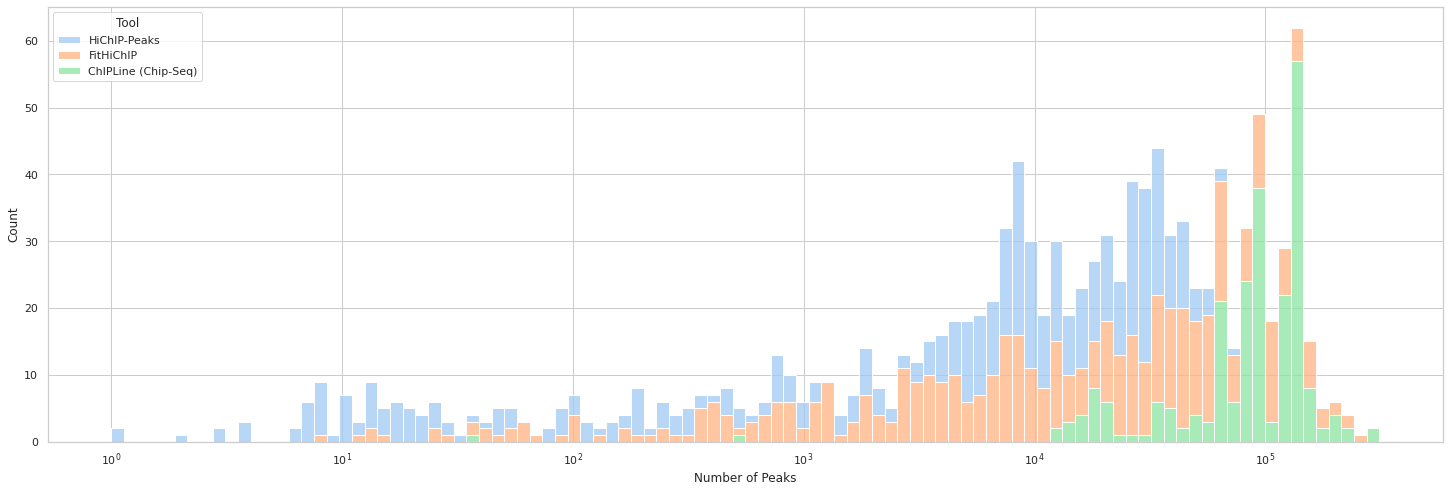

In [85]:
sns.set(rc = {'figure.figsize':(25,8)})
sns.set_theme(style="whitegrid")
sns.histplot(data=com_df, bins=100, x="Number of Peaks", hue='Tool', log_scale=True, multiple="stack", palette='pastel')

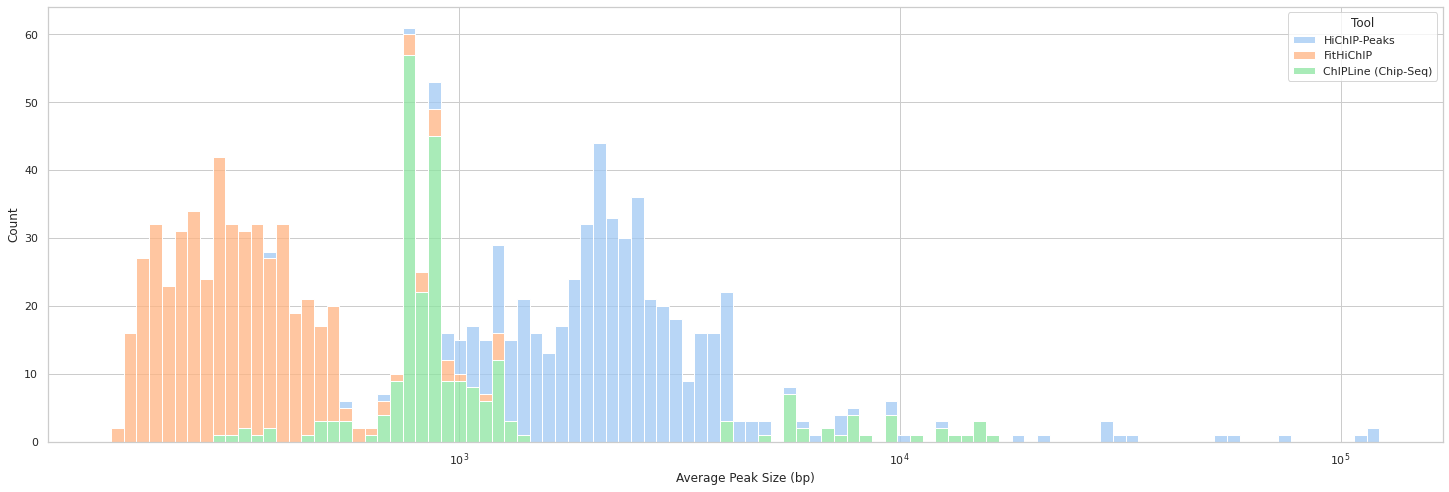

In [86]:
sns.set(rc = {'figure.figsize':(25,8)})
sns.set_theme(style="whitegrid")
ax = sns.histplot(data=com_df, bins=100, x="Average Peak Size (bp)", hue='Tool', log_scale=True, multiple="stack", palette='pastel')
fig = ax.get_figure()
fig.savefig('peak_size_tool_compare.png', dpi=300)

<AxesSubplot:xlabel='Average Peak Size (bp)', ylabel='Count'>

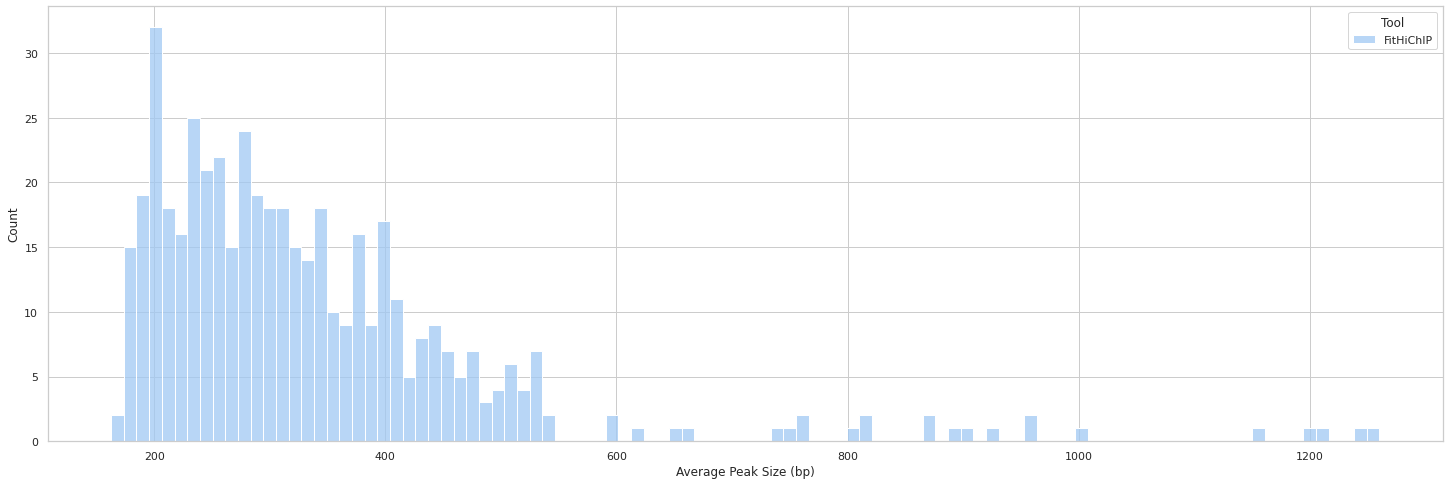

In [41]:
sns.set(rc = {'figure.figsize':(25,8)})
sns.set_theme(style="whitegrid")
sns.histplot(data=fithichip, bins=100, x="Average Peak Size (bp)", hue='Tool', log_scale=False, multiple="stack", palette='pastel')

<AxesSubplot:xlabel='Average Peak Size (bp)', ylabel='Count'>

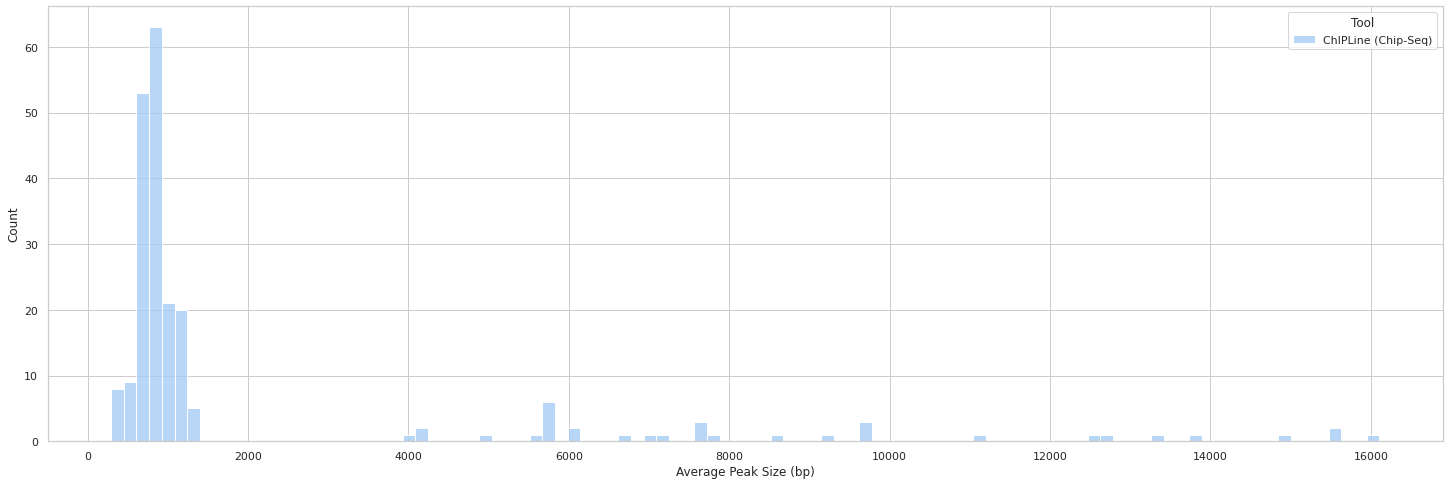

In [42]:
sns.set(rc = {'figure.figsize':(25,8)})
sns.set_theme(style="whitegrid")
sns.histplot(data=chipseq, bins=100, x="Average Peak Size (bp)", hue='Tool', log_scale=False, multiple="stack", palette='pastel')

<AxesSubplot:xlabel='Average Peak Size (bp)', ylabel='Count'>

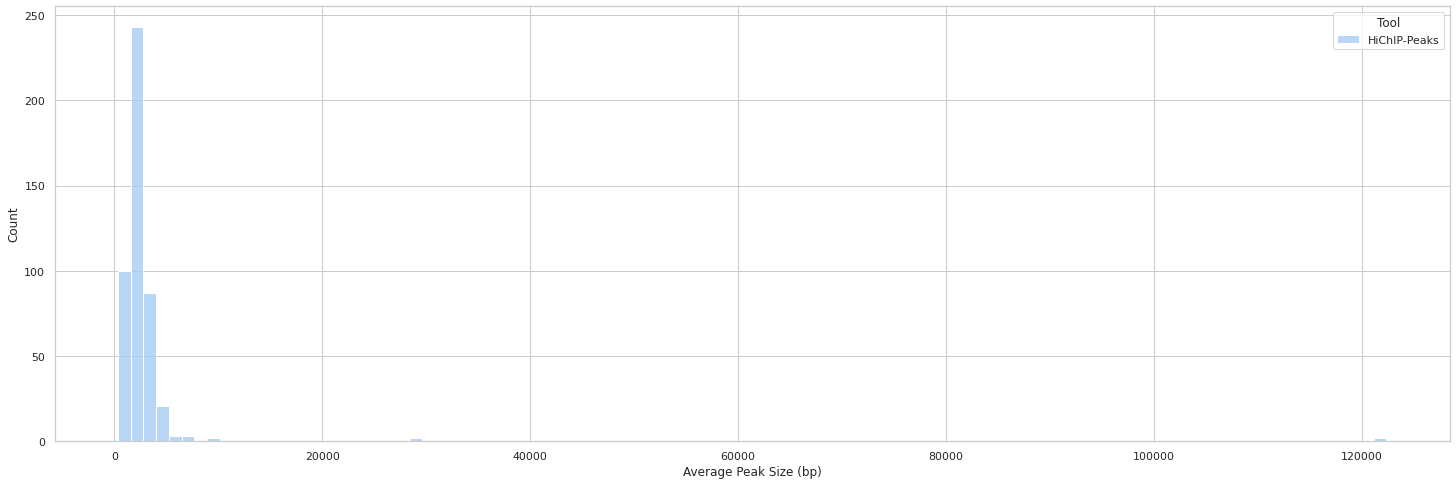

In [43]:
sns.set(rc = {'figure.figsize':(25,8)})
sns.set_theme(style="whitegrid")
sns.histplot(data=hichip_peaks, bins=100, x="Average Peak Size (bp)", hue='Tool', log_scale=False, multiple="stack", palette='pastel')

# Peaks Overlap Analysis

In [8]:
def read_overlap_files(file):
    tot_overlaps = 0
    cshp_overlaps = 0
    csf_overlaps = 0
    chip_w_overlap = []
    chip_w_overlap_no_dups = []
    with open(file) as fr:
        for line in fr:
            if line.startswith('c'):     
                info = line.strip().split()
                tot_overlaps = tot_overlaps + 1
                if info[3] == '1' or (len(info) > 11 and info[10] == '1'):
                    cshp_overlaps = cshp_overlaps + 1
                if info[3] == '2' or (len(info) > 11 and info[10] == '2'):
                    csf_overlaps = csf_overlaps + 1
                chip_w_overlap.append(info[0:3])
        for peak in chip_w_overlap:
            if peak not in chip_w_overlap_no_dups:
                chip_w_overlap_no_dups.append(peak)
    return(tot_overlaps, cshp_overlaps, csf_overlaps, chip_w_overlap)

In [11]:
def create_overlaps_df():
    data = []
    glob_str = 'results/peaks/overlaps/no_slop/*'
    
    for file in glob.glob(glob_str):
        sample_name = file.split('/')[4].split('.overlaps')[0]
        sample_info = []
        sample_info.append(sample_name)
        chipseq_file = get_chipseq_path('results/samplesheets/post-hicpro/peaks_files.samplesheet_1.without_header.tsv', sample_name)
        
        ## read overlaps file
        if os.path.exists(file):
            tot_overlaps, cshp_overlaps, csf_overlaps, chip_w_overlap  = read_overlap_files(file)
            chipseq_peaks = read_chipseq_files(chipseq_file)
            tot_chipseq = len(chipseq_peaks)
            
            sample_info.append(tot_overlaps)
            sample_info.append(cshp_overlaps)
            sample_info.append(csf_overlaps)
            sample_info.append(cshp_overlaps / tot_overlaps * 100)
            sample_info.append(csf_overlaps / tot_overlaps * 100)
            
            sample_info.append(tot_chipseq)
            sample_info.append(chip_w_overlap)
        
        data.append(sample_info)
            
    df = pd.DataFrame(data)
    return df

In [ ]:
overlaps_df = create_overlaps_df()
overlaps_df.columns = ['sample_name', '# Overlaps btwn CS and (HP or F)', '# Overlaps btwn CS and HP', '# Overlaps btwn CS and F', '% HP', '% F', 'Total Chip-seq', 'Chip w Overlaps']
overlaps_df = overlaps_df.sort_values(by=['% F'], ascending=False).reset_index(drop=True)
overlaps_df

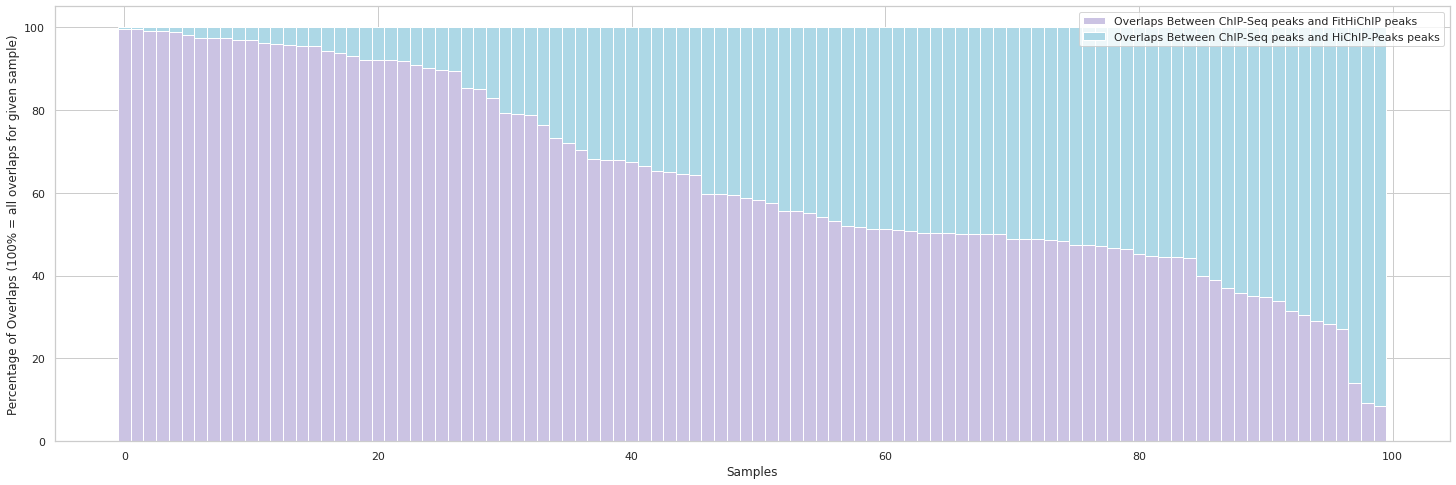

In [114]:
labels = overlaps_df.index
cs_hp = overlaps_df['% HP'].to_list()
cs_f = overlaps_df['% F'].to_list()
width = 1       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, cs_f, width, label='Overlaps Between ChIP-Seq peaks and FitHiChIP peaks', color='#CBC3E3')
ax.bar(labels, cs_hp, width, bottom=cs_f, label='Overlaps Between ChIP-Seq peaks and HiChIP-Peaks peaks', color='#ADD8E6')

ax.set_ylabel('Percentage of Overlaps (100% = all overlaps for given sample)')
ax.set_xlabel('Samples')
ax.legend()

plt.show()

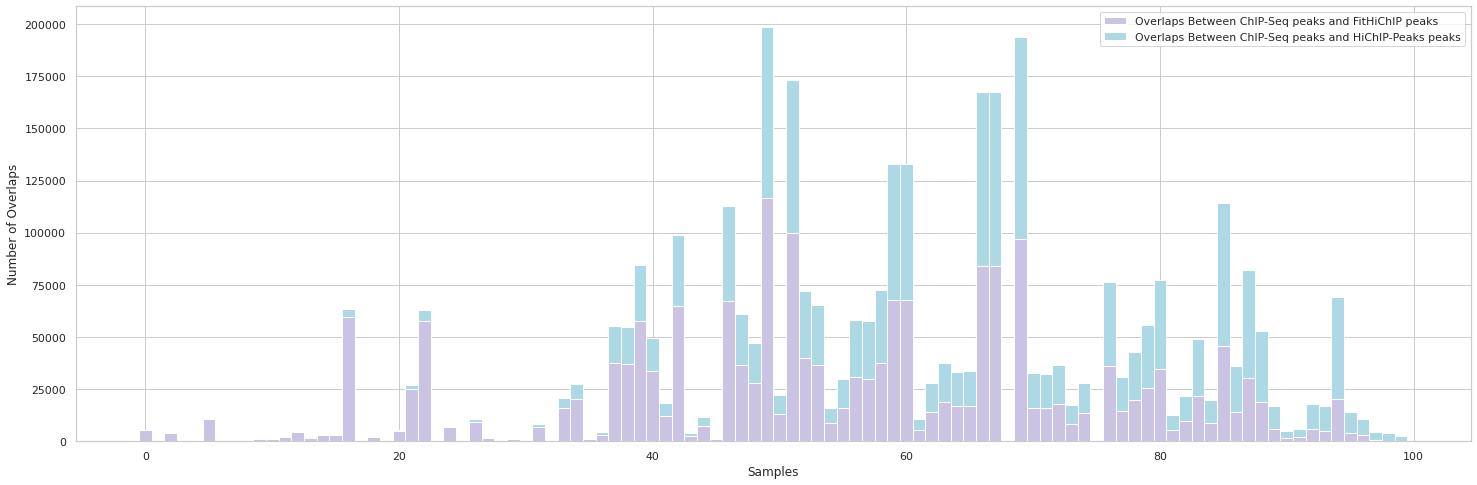

In [115]:
labels = overlaps_df.index
cs_hp = overlaps_df['# Overlaps btwn CS and HP'].to_list()
cs_f = overlaps_df['# Overlaps btwn CS and F'].to_list()
width = 1       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, cs_f, width, label='Overlaps Between ChIP-Seq peaks and FitHiChIP peaks', color='#CBC3E3')
ax.bar(labels, cs_hp, width, bottom=cs_f, label='Overlaps Between ChIP-Seq peaks and HiChIP-Peaks peaks', color='#ADD8E6')

ax.set_ylabel('Number of Overlaps')
ax.set_xlabel('Samples')
ax.legend()

plt.show()

In [7]:
def generate_df():
    data = []
    glob_str = 'ref_genome/results/hicpro/*/hic_results'
    
    for file in glob.glob(glob_str):
        sample_name = file.split('/')[3]
        sample_info = []
        sample_info.append(sample_name)
            
        ## FitHiChIP peaks
        fithichip_path='ref_genome/results/peaks/fithichip/{sn}/MACS2_ExtSize/out_macs2_peaks.narrowPeak'.format(sn = sample_name)
        if os.path.exists(fithichip_path):
            peak_info = read_peak_files(fithichip_path)
            sample_info.append(len(peak_info))
            peak_sizes = []
            for peak in peak_info.items():
                peak_sizes.append(int(int(peak[1][2])-int(peak[1][1])))
            sample_info.append(np.mean(peak_sizes))
        else:
            sample_info.append(0)
            sample_info.append(0)
            
        ## FitHiChIP peaks
        fithichip_path='results/peaks/fithichip/{sn}/MACS2_ExtSize/out_macs2_peaks.narrowPeak'.format(sn = sample_name)
        if os.path.exists(fithichip_path):
            peak_info = read_peak_files(fithichip_path)
            sample_info.append(len(peak_info))
            peak_sizes = []
            for peak in peak_info.items():
                peak_sizes.append(int(int(peak[1][2])-int(peak[1][1])))
            sample_info.append(np.mean(peak_sizes))
        else:
            sample_info.append(0)
            sample_info.append(0)
            
        data.append(sample_info)
    df = pd.DataFrame(data)
    return df

In [6]:
df = generate_df()

/mnt/BioHome/kfetter/.local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/mnt/BioHome/kfetter/.local/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [7]:
cols = ["sample_name", "num_peaks_chm13", "avg_peak_size_chm13", "num_peaks_hg38", "avg_peak_size_hg38"]
df.columns = cols
df.sort_values(by="sample_name", ascending=True).reset_index(drop=True)

,sample_name,num_peaks_chm13,avg_peak_size_chm13,num_peaks_hg38,avg_peak_size_hg38
0,293T-PDS.GSE128106.Homo_Sapiens.YY1.b1,29904,174.480972,29430,174.444852
1,293T-TMPYP4.GSE128106.Homo_Sapiens.YY1.b1,74311,188.027708,73184,187.952298
2,293T.GSE128106.Homo_Sapiens.YY1.b1,1003,181.174477,987,183.697062
3,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,11369,265.514117,11489,265.430151
4,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,10285,255.936315,10428,255.292386
5,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,7653,265.445838,7761,265.823734
6,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,23178,247.086548,23228,247.107327
7,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,8772,206.776106,9018,207.311377
8,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,27647,216.251384,27484,216.063164
9,A673_SA1m1.GSE133227.Homo_Sapiens.CTCF.b1,60043,390.155039,60295,386.202189


In [8]:
len(df.loc[df['num_peaks_chm13'] > df['num_peaks_hg38']])

236

In [11]:
df.describe()

,num_peaks_chm13,avg_peak_size_chm13,num_peaks_hg38,avg_peak_size_hg38
count,486.000000,483.000000,486.000000,483.000000
mean,31207.318930,342.238481,31034.024691,321.473069
std,41396.144357,163.912930,42340.595471,145.025820
min,0.000000,160.833333,0.000000,0.000000
25%,3097.000000,234.549609,2588.750000,230.617565
50%,13028.500000,302.404832,11811.000000,294.431053
75%,44131.250000,398.042910,44075.500000,387.553921
max,232305.000000,1263.363536,256996.000000,1001.919823


In [18]:
def generate_df():
    data = []
    glob_str = 'results/peaks/merged_chipline/*Homo*/'
    
    for file in glob.glob(glob_str):
        sample_name = file.split('/')[3]
        sample_info = []
        sample_info.append(sample_name)
            
        ## hg38/mm10
        peaks_path = file + 'FINAL_IDR_Peaks_FDR0.05.txt'
        if os.path.exists(peaks_path):
            peak_info = read_peak_files(peaks_path)
            sample_info.append(len(peak_info))
            peak_sizes = []
            for peak in peak_info.items():
                peak_sizes.append(int(int(peak[1][2])-int(peak[1][1])))
            sample_info.append(np.mean(peak_sizes))
        else:
            sample_info.append(0)
            sample_info.append(0)
            
        ## hg38/mm10 old
        peaks_path = 'results/peaks/merged_chipline_archive/' + sample_name + '/FINAL_IDR_Peaks_FDR0.05.txt'
        if os.path.exists(peaks_path):
            peak_info = read_peak_files(peaks_path)
            sample_info.append(len(peak_info))
            peak_sizes = []
            for peak in peak_info.items():
                peak_sizes.append(int(int(peak[1][2])-int(peak[1][1])))
            sample_info.append(np.mean(peak_sizes))
        else:
            sample_info.append(0)
            sample_info.append(0)
            
        ## t2t
        peaks_path = 'ref_genome/' + file + 'FINAL_IDR_Peaks_FDR0.05.txt'
        if os.path.exists(peaks_path):
            peak_info = read_peak_files(peaks_path)
            sample_info.append(len(peak_info))
            peak_sizes = []
            for peak in peak_info.items():
                peak_sizes.append(int(int(peak[1][2])-int(peak[1][1])))
            sample_info.append(np.mean(peak_sizes))
        elif "Mus" in sample_name:
            sample_info.append("Mus Musculus")
            sample_info.append("Mus Musculus")
        else:
            sample_info.append(0)
            sample_info.append(0)
            
        data.append(sample_info)
    df = pd.DataFrame(data)
    return df

In [19]:
df = generate_df()

/mnt/BioHome/kfetter/.local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/mnt/BioHome/kfetter/.local/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [20]:
cols = ["sample_name", "num_peaks_hg38/mm10", "avg_peak_size_hg38/mm10", "num_peaks_hg38/mm10_old", "avg_peak_size_hg38/mm10_old", "num_peaks_t2t", "avg_peak_size_t2t"]
df.columns = cols
df.sort_values(by="sample_name").reset_index(drop=True)

,sample_name,num_peaks_hg38/mm10,avg_peak_size_hg38/mm10,num_peaks_hg38/mm10_old,avg_peak_size_hg38/mm10_old,num_peaks_t2t,avg_peak_size_t2t
0,293T-PDS.GSE128106.Homo_Sapiens.YY1.b1,19426,9308.257027,19491,9279.021087,17068,31076.724104
1,293T-TMPYP4.GSE128106.Homo_Sapiens.YY1.b1,22010,1140.796683,21727,4880.460901,17443,30298.065413
2,293T.GSE128106.Homo_Sapiens.YY1.b1,21550,4768.337819,21267,8636.245263,20479,19349.095561
3,BC1.GSE136090.Homo_Sapiens.H3K27ac.b1,13600,14927.378456,13670,14853.297440,14250,11532.659228
4,BC3.GSE136090.Homo_Sapiens.H3K27ac.b1,12902,15468.441792,12866,15508.311363,13143,16699.329681
5,BCBL1.GSE136090.Homo_Sapiens.H3K27ac.b1,18855,12627.619676,18843,12631.704665,19342,10279.075018
6,COLO320-DM.GSE159985.Homo_Sapiens.H3K27ac.b1,16072,13193.594388,15865,13348.401198,14572,27446.535136
7,DTC1-WT.GSE180194.Homo_Sapiens.H3K27ac.b1,0,NaN,0,NaN,15637,33897.621475
8,Erythroblast.GSE131054.Homo_Sapiens.H3K27ac.b1,15529,12523.694958,15584,12481.331879,14693,28852.196216
9,H9-HS.GSE105028.Homo_Sapiens.Rad21.b1,47455,7705.074239,47263,7753.231069,33804,37304.051887


In [21]:
s = df.sample_name.to_list()
ss = []

for sample in s:
    ss.append(sample + "_chipseq.peaks")
" ".join(ss)
    

'THP-1-Vector-Batch1.GSE149420.Homo_Sapiens.H3K4me3.b1_chipseq.peaks NSD2-High-NTKO.GSE131651.Homo_Sapiens.CTCF.b1_chipseq.peaks HK2.GSE147646.Homo_Sapiens.H3K27ac.b1_chipseq.peaks BC1.GSE136090.Homo_Sapiens.H3K27ac.b1_chipseq.peaks DTC1-WT.GSE180194.Homo_Sapiens.H3K27ac.b1_chipseq.peaks HCT116-AuxinNeg.GSE179544.Homo_Sapiens.RNA-Pol-II.b1_chipseq.peaks BC3.GSE136090.Homo_Sapiens.H3K27ac.b1_chipseq.peaks 293T-PDS.GSE128106.Homo_Sapiens.YY1.b1_chipseq.peaks KYSE140_ARV2hrs.GSE166232.Homo_Sapiens.H3K27ac.b1_chipseq.peaks HUDEP-2-WT.GSE131054.Homo_Sapiens.H3K27ac.b1_chipseq.peaks MDA-MB-231-PVT1sgRNAR2.GSE97585.Homo_Sapiens.H3K27ac.b1_chipseq.peaks THP-1-del-cIDR.GSE149420.Homo_Sapiens.H3K27ac.b1_chipseq.peaks SUCCS1-siEA.GSE180194.Homo_Sapiens.H3K27ac.b1_chipseq.peaks SNU16.GSE159985.Homo_Sapiens.H3K27ac.b1_chipseq.peaks SUCCS1-WT.GSE180194.Homo_Sapiens.H3K27ac.b1_chipseq.peaks T47D-T0.GSE179666.Homo_Sapiens.PR.b1_chipseq.peaks 293T-TMPYP4.GSE128106.Homo_Sapiens.YY1.b1_chipseq.peaks THP-

In [22]:
ds_ss = pd.DataFrame(ss)

In [23]:
ds_ss.to_csv("updated_samples_human.tsv", header=False, index=False, sep='\t')

In [15]:
cols = ["sample_name", "num_peaks_hg38/mm10", "avg_peak_size_hg38/mm10", "num_peaks_hg38/mm10_old", "avg_peak_size_hg38/mm10_old", "num_peaks_t2t", "avg_peak_size_t2t"]
df.columns = cols
df.sort_values(by="sample_name").reset_index(drop=True)

,sample_name,num_peaks_hg38/mm10,avg_peak_size_hg38/mm10,num_peaks_hg38/mm10_old,avg_peak_size_hg38/mm10_old,num_peaks_t2t,avg_peak_size_t2t
0,293T-PDS.GSE128106.Homo_Sapiens.YY1.b1,19426,9308.257027,19491,9279.021087,17068,31076.724104
1,293T-TMPYP4.GSE128106.Homo_Sapiens.YY1.b1,22010,1140.796683,21727,4880.460901,17443,30298.065413
2,293T.GSE128106.Homo_Sapiens.YY1.b1,21550,4768.337819,21267,8636.245263,20479,19349.095561
3,BC1.GSE136090.Homo_Sapiens.H3K27ac.b1,13600,14927.378456,13670,14853.297440,14250,11532.659228
4,BC3.GSE136090.Homo_Sapiens.H3K27ac.b1,12902,15468.441792,12866,15508.311363,13143,16699.329681
5,BCBL1.GSE136090.Homo_Sapiens.H3K27ac.b1,18855,12627.619676,18843,12631.704665,19342,10279.075018
6,COLO320-DM.GSE159985.Homo_Sapiens.H3K27ac.b1,16072,13193.594388,15865,13348.401198,14572,27446.535136
7,DTC1-WT.GSE180194.Homo_Sapiens.H3K27ac.b1,0,NaN,0,NaN,15637,33897.621475
8,Erythroblast.GSE131054.Homo_Sapiens.H3K27ac.b1,15529,12523.694958,15584,12481.331879,14693,28852.196216
9,H9-HS.GSE105028.Homo_Sapiens.Rad21.b1,47455,7705.074239,47263,7753.231069,33804,37304.051887


In [17]:
samples = df["sample_name"].to_list()
s = []
for sample in samples:
    s.append(sample + "_chipseq.peaks")

In [16]:
path="/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/samplesheets/hicpro/current.hicpro.samplesheet.without_header.tsv"

In [18]:
num = 1
indices = []
with open(path) as f:
    for line in f:
        if line.strip().split("\t")[0] in samples:
            indices.append(str(num))
        num = num + 1
print(",".join(indices))

1,2,3,40,41,42,53,68,72,92,98,121,122,130,132,148,151,161,185,186,208,209,214,216,218,232,235,281,289,290,293,306,307,308,314,315,316,317,318,319,359,360


In [12]:
num = 1
indices = []
with open(path) as f:
    for line in f:
        if line.strip().split("\t")[0] in samples:
            indices.append(str(num))
        num = num + 1
print(",".join(indices))

68,70,73,74,77,79,83,87,120,122


In [1]:
print(indices)

NameError: name 'indices' is not defined

In [39]:
path="/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/samplesheets/post-hicpro/human.peaks_files.samplesheet.without_header.tsv"

In [45]:
df = pd.read_csv(path, sep="\t", header=None)
columns = ["sample_name", "hicpro_path", "hichip_peaks", "fithichip_peaks", "chipseq_peaks"]
df.columns = columns
df = df[["sample_name", "chipseq_peaks"]]

In [48]:
df = df[df['sample_name'].isin(names)].reset_index(drop=True)

In [49]:
df

,sample_name,chipseq_peaks
0,Aortic-VIC.GSE154513.Homo_Sapiens.H3K27ac.b1,/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/peaks/chipline/Aortic-VIC.GSE154513.Homo_Sapiens.H3K27ac.b1/MACS2_Ext_with_Control/Aortic-VIC.GSE154513.Homo_Sapiens.H3K27ac.b1.macs2_peaks.narrowPeak_Q0.01filt
1,CD4_Naive_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/peaks/chipline/CD4_Naive_merged_donors_hg38.phs001703v3p1.Homo_Sapiens.H3K27ac.b1/MACS2_Ext_No_Control/CD4_Naive_merged_donors_hg38.phs001703v3p1.Homo_Sapiens.H3K27ac.b1.macs2_peaks.narrowPeak_Q0.01filt
2,CD4_Naive_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2,/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/peaks/chipline/CD4_Naive_merged_donors_hg38.phs001703v3p1.Homo_Sapiens.H3K27ac.b1/MACS2_Ext_No_Control/CD4_Naive_merged_donors_hg38.phs001703v3p1.Homo_Sapiens.H3K27ac.b1.macs2_peaks.narrowPeak_Q0.01filt
3,CD4_Naive_1814-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/peaks/chipline/CD4_Naive_merged_donors_hg38.phs001703v3p1.Homo_Sapiens.H3K27ac.b1/MACS2_Ext_No_Control/CD4_Naive_merged_donors_hg38.phs001703v3p1.Homo_Sapiens.H3K27ac.b1.macs2_peaks.narrowPeak_Q0.01filt
4,CD4_Naive_1814-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2,/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/peaks/chipline/CD4_Naive_merged_donors_hg38.phs001703v3p1.Homo_Sapiens.H3K27ac.b1/MACS2_Ext_No_Control/CD4_Naive_merged_donors_hg38.phs001703v3p1.Homo_Sapiens.H3K27ac.b1.macs2_peaks.narrowPeak_Q0.01filt
5,CD4_Naive_1815-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/peaks/chipline/CD4_Naive_merged_donors_hg38.phs001703v3p1.Homo_Sapiens.H3K27ac.b1/MACS2_Ext_No_Control/CD4_Naive_merged_donors_hg38.phs001703v3p1.Homo_Sapiens.H3K27ac.b1.macs2_peaks.narrowPeak_Q0.01filt
6,CD4_Naive_1815-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2,/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/peaks/chipline/CD4_Naive_merged_donors_hg38.phs001703v3p1.Homo_Sapiens.H3K27ac.b1/MACS2_Ext_No_Control/CD4_Naive_merged_donors_hg38.phs001703v3p1.Homo_Sapiens.H3K27ac.b1.macs2_peaks.narrowPeak_Q0.01filt
7,CD4_Naive_1816-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/peaks/chipline/CD4_Naive_merged_donors_hg38.phs001703v3p1.Homo_Sapiens.H3K27ac.b1/MACS2_Ext_No_Control/CD4_Naive_merged_donors_hg38.phs001703v3p1.Homo_Sapiens.H3K27ac.b1.macs2_peaks.narrowPeak_Q0.01filt
8,CD4_Naive_1816-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2,/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/peaks/chipline/CD4_Naive_merged_donors_hg38.phs001703v3p1.Homo_Sapiens.H3K27ac.b1/MACS2_Ext_No_Control/CD4_Naive_merged_donors_hg38.phs001703v3p1.Homo_Sapiens.H3K27ac.b1.macs2_peaks.narrowPeak_Q0.01filt
9,CD4_Naive_1829-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/peaks/chipline/CD4_Naive_merged_donors_hg38.phs001703v3p1.Homo_Sapiens.H3K27ac.b1/MACS2_Ext_No_Control/CD4_Naive_merged_donors_hg38.phs001703v3p1.Homo_Sapiens.H3K27ac.b1.macs2_peaks.narrowPeak_Q0.01filt


In [53]:
df = df.loc[df["chipseq_peaks"].str.contains("/chipline/")].reset_index(drop=True)

In [67]:
df["fithichip_loops"] = "/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/motif_analysis/conserved_anchors_prototype/samples/" + df["sample_name"] + "_chipseq.peaks"

In [68]:
df

,sample_name,chipseq_peaks,fithichip_loops
0,Aortic-VIC.GSE154513.Homo_Sapiens.H3K27ac.b1,/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/peaks/chipline/Aortic-VIC.GSE154513.Homo_Sapiens.H3K27ac.b1/MACS2_Ext_with_Control/Aortic-VIC.GSE154513.Homo_Sapiens.H3K27ac.b1.macs2_peaks.narrowPeak_Q0.01filt,/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/motif_analysis/conserved_anchors_prototype/samples/Aortic-VIC.GSE154513.Homo_Sapiens.H3K27ac.b1_chipseq.peaks
1,CD4_Naive_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/peaks/chipline/CD4_Naive_merged_donors_hg38.phs001703v3p1.Homo_Sapiens.H3K27ac.b1/MACS2_Ext_No_Control/CD4_Naive_merged_donors_hg38.phs001703v3p1.Homo_Sapiens.H3K27ac.b1.macs2_peaks.narrowPeak_Q0.01filt,/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/motif_analysis/conserved_anchors_prototype/samples/CD4_Naive_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1_chipseq.peaks
2,CD4_Naive_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2,/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/peaks/chipline/CD4_Naive_merged_donors_hg38.phs001703v3p1.Homo_Sapiens.H3K27ac.b1/MACS2_Ext_No_Control/CD4_Naive_merged_donors_hg38.phs001703v3p1.Homo_Sapiens.H3K27ac.b1.macs2_peaks.narrowPeak_Q0.01filt,/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/motif_analysis/conserved_anchors_prototype/samples/CD4_Naive_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2_chipseq.peaks
3,CD4_Naive_1814-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/peaks/chipline/CD4_Naive_merged_donors_hg38.phs001703v3p1.Homo_Sapiens.H3K27ac.b1/MACS2_Ext_No_Control/CD4_Naive_merged_donors_hg38.phs001703v3p1.Homo_Sapiens.H3K27ac.b1.macs2_peaks.narrowPeak_Q0.01filt,/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/motif_analysis/conserved_anchors_prototype/samples/CD4_Naive_1814-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1_chipseq.peaks
4,CD4_Naive_1814-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2,/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/peaks/chipline/CD4_Naive_merged_donors_hg38.phs001703v3p1.Homo_Sapiens.H3K27ac.b1/MACS2_Ext_No_Control/CD4_Naive_merged_donors_hg38.phs001703v3p1.Homo_Sapiens.H3K27ac.b1.macs2_peaks.narrowPeak_Q0.01filt,/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/motif_analysis/conserved_anchors_prototype/samples/CD4_Naive_1814-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2_chipseq.peaks
5,CD4_Naive_1815-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/peaks/chipline/CD4_Naive_merged_donors_hg38.phs001703v3p1.Homo_Sapiens.H3K27ac.b1/MACS2_Ext_No_Control/CD4_Naive_merged_donors_hg38.phs001703v3p1.Homo_Sapiens.H3K27ac.b1.macs2_peaks.narrowPeak_Q0.01filt,/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/motif_analysis/conserved_anchors_prototype/samples/CD4_Naive_1815-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1_chipseq.peaks
6,CD4_Naive_1815-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2,/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/peaks/chipline/CD4_Naive_merged_donors_hg38.phs001703v3p1.Homo_Sapiens.H3K27ac.b1/MACS2_Ext_No_Control/CD4_Naive_merged_donors_hg38.phs001703v3p1.Homo_Sapiens.H3K27ac.b1.macs2_peaks.narrowPeak_Q0.01filt,/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/motif_analysis/conserved_anchors_prototype/samples/CD4_Naive_1815-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2_chipseq.peaks
7,CD4_Naive_1816-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/peaks/chipline/CD4_Naive_merged_donors_hg38.phs001703v3p1.Homo_Sapiens.H3K27ac.b1/MACS2_Ext_No_Control/CD4_Naive_merged_donors_hg38.phs001703v3p1.Homo_Sapiens.H3K27ac.b1.macs2_peaks.narrowPeak_Q0.01

In [35]:
path = "results/motif_analysis/conserved_anchors_prototype/samples/*"
names = []
for sample in glob.glob(path):
    sample_name = sample.strip().split("/")[4].split("_chipseq.peaks")[0]
    names.append(sample_name)

In [37]:
print(names)

['Naive_K_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1', 'DTC1-WT.GSE180194.Homo_Sapiens.H3K27ac.b1', 'Monocyte_1816-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1', 'CD4_Naive_1816-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2', 'Monocyte_1814-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1', 'Naive_K_1814-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2', 'Naive_K_1816-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2', 'MDA-MB-453-Abemaciclib.GSE157381.Homo_Sapiens.H3K27ac.b1', 'CD8_Naive_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1', 'CD8_Naive_1815-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1', 'CD4_Naive_1831-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b3', 'CD4_Naive_1831-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1', 'Naive_B_1816-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2', 'CD4_Naive_1816-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1', 'MDA-MB-231-PVT1sgRNAR3.GSE97585.Homo_Sapiens.H3K27ac.b1', 'THP-1-del-cIDR.GSE149420.Homo_Sapiens.H3K27ac.b1', 'Aortic-VIC.GSE154513.Homo_Sapiens.H3K27ac.b1', 'MDA-MB-231-P

In [54]:
df

,sample_name,chipseq_peaks
0,Aortic-VIC.GSE154513.Homo_Sapiens.H3K27ac.b1,/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/peaks/chipline/Aortic-VIC.GSE154513.Homo_Sapiens.H3K27ac.b1/MACS2_Ext_with_Control/Aortic-VIC.GSE154513.Homo_Sapiens.H3K27ac.b1.macs2_peaks.narrowPeak_Q0.01filt
1,CD4_Naive_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/peaks/chipline/CD4_Naive_merged_donors_hg38.phs001703v3p1.Homo_Sapiens.H3K27ac.b1/MACS2_Ext_No_Control/CD4_Naive_merged_donors_hg38.phs001703v3p1.Homo_Sapiens.H3K27ac.b1.macs2_peaks.narrowPeak_Q0.01filt
2,CD4_Naive_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2,/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/peaks/chipline/CD4_Naive_merged_donors_hg38.phs001703v3p1.Homo_Sapiens.H3K27ac.b1/MACS2_Ext_No_Control/CD4_Naive_merged_donors_hg38.phs001703v3p1.Homo_Sapiens.H3K27ac.b1.macs2_peaks.narrowPeak_Q0.01filt
3,CD4_Naive_1814-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/peaks/chipline/CD4_Naive_merged_donors_hg38.phs001703v3p1.Homo_Sapiens.H3K27ac.b1/MACS2_Ext_No_Control/CD4_Naive_merged_donors_hg38.phs001703v3p1.Homo_Sapiens.H3K27ac.b1.macs2_peaks.narrowPeak_Q0.01filt
4,CD4_Naive_1814-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2,/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/peaks/chipline/CD4_Naive_merged_donors_hg38.phs001703v3p1.Homo_Sapiens.H3K27ac.b1/MACS2_Ext_No_Control/CD4_Naive_merged_donors_hg38.phs001703v3p1.Homo_Sapiens.H3K27ac.b1.macs2_peaks.narrowPeak_Q0.01filt
5,CD4_Naive_1815-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/peaks/chipline/CD4_Naive_merged_donors_hg38.phs001703v3p1.Homo_Sapiens.H3K27ac.b1/MACS2_Ext_No_Control/CD4_Naive_merged_donors_hg38.phs001703v3p1.Homo_Sapiens.H3K27ac.b1.macs2_peaks.narrowPeak_Q0.01filt
6,CD4_Naive_1815-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2,/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/peaks/chipline/CD4_Naive_merged_donors_hg38.phs001703v3p1.Homo_Sapiens.H3K27ac.b1/MACS2_Ext_No_Control/CD4_Naive_merged_donors_hg38.phs001703v3p1.Homo_Sapiens.H3K27ac.b1.macs2_peaks.narrowPeak_Q0.01filt
7,CD4_Naive_1816-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/peaks/chipline/CD4_Naive_merged_donors_hg38.phs001703v3p1.Homo_Sapiens.H3K27ac.b1/MACS2_Ext_No_Control/CD4_Naive_merged_donors_hg38.phs001703v3p1.Homo_Sapiens.H3K27ac.b1.macs2_peaks.narrowPeak_Q0.01filt
8,CD4_Naive_1816-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2,/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/peaks/chipline/CD4_Naive_merged_donors_hg38.phs001703v3p1.Homo_Sapiens.H3K27ac.b1/MACS2_Ext_No_Control/CD4_Naive_merged_donors_hg38.phs001703v3p1.Homo_Sapiens.H3K27ac.b1.macs2_peaks.narrowPeak_Q0.01filt
9,CD4_Naive_1829-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/peaks/chipline/CD4_Naive_merged_donors_hg38.phs001703v3p1.Homo_Sapiens.H3K27ac.b1/MACS2_Ext_No_Control/CD4_Naive_merged_donors_hg38.phs001703v3p1.Homo_Sapiens.H3K27ac.b1.macs2_peaks.narrowPeak_Q0.01filt


In [69]:
df.to_csv("h3k27ac_fithichip_samples.tsv", header=False, index=False, sep='\t')